# Predictive Analysis using sci-kit-learn
## *DAV 5400 Project 4*

## Phase I: Data Acquisition, Data Preparation & Exploratory Data Analysis 

----------------------------------------------------
### 1. Introduction:

The main purpose of this project is to develop an effective and robust predictive model that can predict whether a customer is willing to purchase a new product or not. By using the previous customer's data this model aims to provide insights into customers purchasing behaviour, which helps the company to optimize its sales and marketing strategies. With this predictive model, the company can also strengthen its relationship with the already existing customers which might help them in the long run. An accurate prediction model also helps the company to focus their marketing efforts on a specific group of customers which saves their investment of time and money on all other categories. The sales team can also increase their efficiency and effectiveness on these potential customers. The predictive model serves as a valuable tool for strategic decision-making, enabling the company to allocate resources more efficiently, prioritize customer segments, and optimize product offerings based on anticipated demand.

----------------------------------------------------------------
### 2. Data Loading

#### Step 1: Import Python Libraries

- Import all libraries that are required for our analysis, such as Data Loading, Statistical analysis, Visualization etc.

- __Pandas__ and __Numpy__ have been used for __Data Manipulation__ and __numerical Calculations__.

- __Matplotlib__ and __Seaborn__ have been used for __Data visualizations__. 

- GitHub source link:https://raw.githubusercontent.com/Nikkat-Afrin/DAV-5400/master/Project%204%20DATA.csv

In [463]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

#### Step 2: Reading Dataset
- Here, we are using the __read_csv()__ function, to convert the data into the panda's data frame.
- The data is stored in the DataFrame __data__.

In [464]:
# load the data set
df = pd.read_csv("https://raw.githubusercontent.com/Nikkat-Afrin/DAV-5400/master/Project%204%20DATA.csv")
df

,TARGET,loyalty,ID,age,city,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,age_P,lor_M
0,Y,99,77,66,2,0,0,0,0,333.561114,264.721010,66,3
1,Y,1,159,45,2,1,3,3,1,394.735699,284.904978,45,39
2,Y,1,220,42,2,1,3,6,1,342.180990,1175.589721,42,27
3,Y,99,303,31,2,0,0,0,0,453.757916,242.341754,31,3
4,Y,99,306,62,2,0,0,0,0,384.577469,287.008370,62,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14011,Y,99,151601,30,2,0,0,0,0,386.434278,284.309508,30,3
14012,Y,1,151634,27,2,1,3,3,1,376.842591,266.993794,27,27
14013,Y,99,151679,26,2,0,0,0,0,434.805703,284.629361,26,3
14014,Y,1,151804,75,2,1,3,3,1,366.273857,270.573265,75,15


In [465]:
df.shape

(14016, 13)

The __shape__ method tells us that the dataset contains __14016__ rows, and each row contains __13__ attributes.

------------------------------------------------------
### 3. Data  Dictionary

<body>
    <h3 style="color: #333; font-family: Arial, sans-serif;">Customer Data Attributes</h3>
    <table style="width: 100%; border-collapse: collapse; margin-top: 20px;">
        <tr>
            <th style="border: 1px solid #999; padding: 10px; text-align: left; background-color: #f2f2f2; color: #333;">Attribute</th>
            <th style="border: 1px solid #999; padding: 10px; text-align: left; background-color: #f2f2f2; color: #333;">Description</th>
        </tr>
        <tr style="background-color: #f2f2f2;">
            <td style="border: 1px solid #999; padding: 10px; text-align: left;">ID</td>
            <td style="border: 1px solid #999; padding: 10px; text-align: left;">Unique customer identifier</td>
        </tr>
        <tr style="background-color: #f2f2f2;">
            <td style="border: 1px solid #999; padding: 10px; text-align: left;">TARGET</td>
            <td style="border: 1px solid #999; padding: 10px; text-align: left;">Indicator of customer buying the new product (N = no, Y = yes)</td>
        </tr>
        <tr style="background-color: #f2f2f2;">
            <td style="border: 1px solid #999; padding: 10px; text-align: left;">Loyalty</td>
            <td style="border: 1px solid #999; padding: 10px; text-align: left;">Customer loyalty level, from low to high (0 to 3), 99 = unclassified</td>
        </tr>
        <tr style="background-color: #f2f2f2;">
            <td style="border: 1px solid #999; padding: 10px; text-align: left;">Age</td>
            <td style="border: 1px solid #999; padding: 10px; text-align: left;">Customer age in years</td>
        </tr>
        <tr style="background-color: #f2f2f2;">
            <td style="border: 1px solid #999; padding: 10px; text-align: left;">City</td>
            <td style="border: 1px solid #999; padding: 10px; text-align: left;">Unique code per city (where the customer resides)</td>
        </tr>
        <tr style="background-color: #f2f2f2;">
            <td style="border: 1px solid #999; padding: 10px; text-align: left;">Age_p</td>
            <td style="border: 1px solid #999; padding: 10px; text-align: left;">Age of customer’s partner in years</td>
        </tr>
        <tr style="background-color: #f2f2f2;">
            <td style="border: 1px solid #999; padding: 10px; text-align: left;">LOR_m</td>
            <td style="border: 1px solid #999; padding: 10px; text-align: left;">Length of customer’s relationship with company (in months)</td>
        </tr>
        <tr style="background-color: #f2f2f2;">
            <td style="border: 1px solid #999; padding: 10px; text-align: left;">Prod_A</td>
            <td style="border: 1px solid #999; padding: 10px; text-align: left;">Customer previously bought Product A (0=no, 1=yes)</td>
        </tr>
        <tr style="background-color: #f2f2f2;">
            <td style="border: 1px solid #999; padding: 10px; text-align: left;">Type_A</td>
            <td style="border: 1px solid #999; padding: 10px; text-align: left;">Type of product A</td>
        </tr>
        <tr style="background-color: #f2f2f2;">
            <td style="border: 1px solid #999; padding: 10px; text-align: left;">Turnover_A</td>
            <td style="border: 1px solid #999; padding: 10px; text-align: left;">Amount of money customer spent on Product A</td>
        </tr>
        <tr style="background-color: #f2f2f2;">
            <td style="border: 1px solid #999; padding: 10px; text-align: left;">Prod_B</td>
            <td style="border: 1px solid #999; padding: 10px; text-align: left;">Customer previously bought Product B (0=no, 1=yes)</td>
        </tr>
        <tr style="background-color: #f2f2f2;">
            <td style="border: 1px solid #999; padding: 10px; text-align: left;">Type_B</td>
            <td style="border: 1px solid #999; padding: 10px; text-align: left;">Type of product B</td>
        </tr>
        <tr style="background-color: #f2f2f2;">
            <td style="border: 1px solid #999; padding: 10px; text-align: left;">Turnover_B</td>
            <td style="border: 1px solid #999; padding: 10px; text-align: left;">Amount of money customer spent on Product B</td>
        </tr>
    </table>
</body>

### Let's study the attributes of the __df__ data frame with the given data dictionary.

#### 1. __ID: Unique customer identifier__.
- As the ID should be unique for the every customer then the no.of unique value in ID should be equal to no. of rows in the data frame df

In [466]:
# finding out unique number of values in the ID variable
df['ID'].nunique()

11008

Although we have __14016__ rows, that should contain 14016 unique ID values but on the contrast we got only __11008__ unique ID values

In [467]:

# Checking if all values in the 'ID' column are unique
all_unique = df['ID'].is_unique

if all_unique:
    print("All values in the 'id' column are unique.")
else:
    # Counting the occurrences of each value in the 'ID' column
    id_counts = df['ID'].value_counts()
    
    # Filtering out the values that are repeated
    repeated_ids = id_counts[id_counts > 1]
    
    print("The following values in the 'ID' column are repeated:")
    for id_value, count in repeated_ids.items():
        print(f"ID: {id_value}, Repeated {count} times.")
        
    

The following values in the 'ID' column are repeated:
ID: 77, Repeated 2 times.
ID: 103791, Repeated 2 times.
ID: 103370, Repeated 2 times.
ID: 103452, Repeated 2 times.
ID: 103464, Repeated 2 times.
ID: 103510, Repeated 2 times.
ID: 103528, Repeated 2 times.
ID: 103547, Repeated 2 times.
ID: 103648, Repeated 2 times.
ID: 103691, Repeated 2 times.
ID: 103778, Repeated 2 times.
ID: 103792, Repeated 2 times.
ID: 103223, Repeated 2 times.
ID: 103794, Repeated 2 times.
ID: 103918, Repeated 2 times.
ID: 103946, Repeated 2 times.
ID: 103961, Repeated 2 times.
ID: 104044, Repeated 2 times.
ID: 104077, Repeated 2 times.
ID: 104087, Repeated 2 times.
ID: 104101, Repeated 2 times.
ID: 104119, Repeated 2 times.
ID: 103367, Repeated 2 times.
ID: 103190, Repeated 2 times.
ID: 77575, Repeated 2 times.
ID: 102544, Repeated 2 times.
ID: 102196, Repeated 2 times.
ID: 102312, Repeated 2 times.
ID: 102358, Repeated 2 times.
ID: 102382, Repeated 2 times.
ID: 102389, Repeated 2 times.
ID: 102409, Repeated 

In [468]:
len(repeated_ids)

3008

So, __3008__ IDs have repeatition that means 
- They are contributing to __2 X 3008__ = __6016__ rows,
- If the extra row per id is a duplicate, then there are in total __3008__ extra rows which are copy of some other row.

Therefore, the count of unique IDs should match the number of rows in a dataframe where we drop the duplicate rows.
__14016__ - __3008__ = __11008__

Let's, assume that the repeated ID's rows are similar, and if we drop the duplicate rows from the data frame and check the unique values in the ID's then we should get the value as __11008__. 

In [469]:
# droppigng the duplicate values from the original data frame and saving it in df2
df2=df.copy()
df2=df2.drop_duplicates()
len(df2)

11008

In [470]:
len(df)

14016

Hence, our assumption is true most of the IDs that are repeated have the same rows which basically means the data has duplicate rows and we have unique IDs for each customer.

#### 2. __TARGET: Indicator of customer buying the new product (N = no, Y = yes)__

- Let's verify if the __TARGET attribute__ data is __N or Y__ as given in the data description and check for null values.

In [471]:
# extracting the unique values in the TARGET variable
df['TARGET'].unique()

array(['Y', 'N'], dtype=object)

- Here, It is confirmed that our data matches its description and it doesn't has any null values.
- It's data type is object which means it is a categorical variable.

#### 3.  __Loyalty: Customer loyalty level, from low to high (0 to 3), 99 = unclassified__

- Let's verify if the __Loyalty__ attribute data is from __0 to 3 or 99__ as given in the data description and check for null values.

In [472]:
# extracting the unique values in the loyalty variable
df['loyalty'].unique()

array([99,  1,  3,  2,  0], dtype=int64)

- Here, It is confirmed that our data matches its description and it doesn't have any null values.
- Even though the data type of __Loyalty__ is considered an integer because of the numerical data values it belongs to the __categorical variable__.

#### 4.  Age: Customer age in years

In [473]:
# extracting the unique values in the age variable
df['age'].unique()

array([ 66,  45,  42,  31,  62,  24,  57,  32,  28,  30,  44,  36,  38,
        34,  51,  27,  56,  48,  54,  61,  37,  49,  23,  43,  70,  25,
        35,  60,  41,  39,  47,  33,  40,  46,  76,  68,  26,  50,  53,
        55,  52,  29,  64,  74,  69,  59,  67,  71,  65,  63,  80,  58,
        93,  75,  79,  88,  89,  72,  91,  73,  83,  77,  78,  84,  94,
        85,  82,  90,  86, 102,  14,  22,   5, 100,  21,  13,  87,  17,
        81,  15,  11,  10,  92,  18,  12,  19], dtype=int64)

- Here, we can see that some customer's age is recorded as __5, 11, 12, and 15__ we __assume__ these might be __outliers__ because these customers are too young to purchase a product.
- It is a Numerical variable.

#### 5. City: Unique code per city (where the customer resides)

- Many customers can come from one city as the customers and cities have many to one relationship the city code might not be unique for various customers.
- For, this let's check whether we have null values or not and look for some outliers.

In [474]:
# extracting the unique values in the city variable
df['city'].unique()

array([      2,       5,       4,       1,       0,       7,       6,
             9,      11,       8,      14,      15,      12,     116,
            13,     111,      10,       3,     114,     142, -999999,
           229,     178,     110,     177,     137,      17,     148,
           122,      22,      58,     121,     127,      33,     125,
           209,      72,      31,      51,      16,     107,     174,
           141,     191,     104,     129,      18,      49,      73,
            94,     131,     219,     187,      28,      89,     115,
            53,     126,      47,      84,     235,     161,     197,
            23,      30], dtype=int64)

As we can see there are no null values but we can see that there is a city code as __-999999__ but that is not possible as the city codes can not be negative and the number of digits in that is __6__ which is not possible to be either.
- So, we consider __-999999__  as an __outlier__ over here.
- It is a __Categorical variable__ but due to the presence of the numbers it is considered as the integer data type.

#### 6. Age_p: Age of customer’s partner in years

- Over here it is stated as Customer's partner so the age should be 18 or above. If any value is detected below 18 it can be considered as an outlier.

In [475]:
# extracting the unique values in the age_P variable
df['age_P'].unique()

array([ 66,  45,  42,  31,  62,  24,  57,  32,  28,  30,  44,  36,  38,
        34,  51,  27,  56,  48,  54,  61,  37,  49,  23,  43,  70,  25,
        35,  60,  41,  39,  47,  33,  40,  46,  76,  68,  26,  50,  53,
        55,  52,  29,  64,  74,  69,  59,  67,  71,  65,  63,  80,  58,
        93,  75,  79,  88,  89,  72,  91,  73,  83,  77,  78,  84,  94,
        85,  82,  90,  86, 102,  14,  22,   5, 100,  21,  13,  87,  17,
        81,  15,  11,  10,  92,  18,  12,  19], dtype=int64)

- Here, we can see that the data is similar to that of age attribute.
- There are no null values in these.
- But we can spot some __outliers__ here as the __partners age__ group is given as __5,11,12,15__ which is not possible.
- It is a Numerical variable.

#### 7. LOR_m: Length of customer’s relationship with company (in months)

In [476]:
# extracting the unique values in the lor_M variable
df['lor_M'].unique()

array([ 3, 39, 27, 15, 63, 51, 75], dtype=int64)

- We have no null values here.
- The length of relationship between the customers and the company ranges from 3 to 75 months.
- It belongs to Numerical variable and integer data type.

#### 8. Prod_A and Prod_B : Customer previously bought Product A (0=no, 1=yes) and Customer previously bought Product B (0=no, 1=yes) 

In [477]:
# extracting the unique values in the prod_A variable
df['prod_A'].unique()

array([0, 1], dtype=int64)

In [478]:
# extracting the unique values in the prod_B variable
df['prod_B'].unique()

array([0, 1], dtype=int64)

- Here, It is confirmed that our data of both __prod_A and prod_B__ matches its description and it doesn't have any null values.
- Even though the data type of __prod_A and prod_B__ is considered an integer because of the numerical data values it belongs to the __categorical variable__.

#### 9. Type_A and Type_B : Type of product A and Type of product B

In [479]:
# extracting the unique values in the type_A variable
df['type_A'].unique()

array([0, 3, 6], dtype=int64)

In [480]:
# extracting the unique values in the type_B variable
df['type_B'].unique()

array([0, 3, 6, 9], dtype=int64)

- Here, It is confirmed that our data of both __type_A and type_B__ matches its description and it doesn't have any null values.
- Even though the data type of __type_A and type_B__ is considered an integer because of the numerical data values it belongs to the __categorical variable__.

#### 10. Turnover_A and Turnover_B : Amount of money customer spent on Product A and Amount of money customer spent on Product B

In [481]:
# checking for the null values in the turnover_A variable
df['turnover_A'].isnull().sum()

0

In [482]:
# looking over the data type of the turnover_A variable
df['turnover_A'].dtype

dtype('float64')

In [483]:
# checking for the null values in the turnover_B variable
df['turnover_B'].isnull().sum()

0

In [484]:
# looking over the data type of the turnover_B variable
df['turnover_A'].dtype

dtype('float64')

- Here, It is confirmed that our data of both __turnover_A and turnover_B__ matches its description and it doesn't have any null values.
- Both __turnover_A and turnover_B__ are numerical variable and is of floating point data.

Hence, the data confirms the dictionary.

---------------------------------------------------
### 4.Creation of DataFrame subset

In [485]:
# Apart from existing columns I'm choosing 'turnover_A' and 'turnover_B' as per the assingment demands 
sub_df= df[['TARGET','age','type_A','type_B','lor_M','turnover_A','turnover_B']]
sub_df

,TARGET,age,type_A,type_B,lor_M,turnover_A,turnover_B
0,Y,66,0,0,3,333.561114,264.721010
1,Y,45,3,3,39,394.735699,284.904978
2,Y,42,3,6,27,342.180990,1175.589721
3,Y,31,0,0,3,453.757916,242.341754
4,Y,62,0,0,3,384.577469,287.008370
...,...,...,...,...,...,...,...
14011,Y,30,0,0,3,386.434278,284.309508
14012,Y,27,3,3,27,376.842591,266.993794
14013,Y,26,0,0,3,434.805703,284.629361
14014,Y,75,3,3,15,366.273857,270.573265


In [486]:
# using replace() for replacing the data values of Y and N as 1 and 0
sub_df['TARGET'] = sub_df['TARGET'].replace({'Y': 1, 'N': 0})
sub_df

,TARGET,age,type_A,type_B,lor_M,turnover_A,turnover_B
0,1,66,0,0,3,333.561114,264.721010
1,1,45,3,3,39,394.735699,284.904978
2,1,42,3,6,27,342.180990,1175.589721
3,1,31,0,0,3,453.757916,242.341754
4,1,62,0,0,3,384.577469,287.008370
...,...,...,...,...,...,...,...
14011,1,30,0,0,3,386.434278,284.309508
14012,1,27,3,3,27,376.842591,266.993794
14013,1,26,0,0,3,434.805703,284.629361
14014,1,75,3,3,15,366.273857,270.573265


---------------------------------------------------
### 5.Exploratory Data Analysis

In [487]:
sub_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14016 entries, 0 to 14015
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TARGET      14016 non-null  int64  
 1   age         14016 non-null  int64  
 2   type_A      14016 non-null  int64  
 3   type_B      14016 non-null  int64  
 4   lor_M       14016 non-null  int64  
 5   turnover_A  14016 non-null  float64
 6   turnover_B  14016 non-null  float64
dtypes: float64(2), int64(5)
memory usage: 766.6 KB


- __sub_df.info()__ function provides a concise summary of the DataFrame, that includes the information about the RangeIndex, Data column, Column names their non-null values count, and data types of each column. 

Although the above information indicates that columns such as __Type_A, and Type_B__ are classified as integer data types, they fall under __categorical data__.

In [488]:
sub_df.isnull().sum()

TARGET        0
age           0
type_A        0
type_B        0
lor_M         0
turnover_A    0
turnover_B    0
dtype: int64

There are no null vales in the data.

#### Summary Statistics of Numerical Data:
1. Age
2. LOR_m
3. Turnover_A
4. Turnover_B

In [489]:
sub_df[['age','lor_M','turnover_A','turnover_B']].describe()

,age,lor_M,turnover_A,turnover_B
count,14016.000000,14016.000000,14016.000000,14016.000000
mean,35.882920,14.115582,379.161320,328.628207
std,12.974634,11.582550,92.612207,475.616525
min,5.000000,3.000000,300.095909,191.962852
25%,25.000000,3.000000,334.919412,219.406925
50%,33.000000,15.000000,367.891493,237.656757
75%,43.000000,15.000000,399.744924,264.131538
max,102.000000,75.000000,5568.784139,12249.084770


1. __age__:

- Count: There are 14,016 non-null values for age.
- Mean: The average age is approximately 35.88 years.
- Standard Deviation: The spread of ages around the mean is 12.97 years.
- Minimum: The youngest age observed is 5 years. This might be an outlier.
- 25%: 25% of the customers are the age of 25 years.
- Median/50%: 50% of customers are the age of 33 years.
- 75%: 75% of customers are the age of 43 years.
- Maximum: The oldest age observed is 102 years.

2. __lor_M__:

- Count: There are 14,016 non-null values for lor_M.
- Mean: The average length of the relationship of the customers with the company is 14.11 months.
- Std: The spread of lengths of relationship around the mean is 11.58 months.
- Min: The shortest length of the relationship observed is 3 months.
- 25%: 25% of the customers have a relationship length of 3 months.
- Median/ 50%: 50% of the customers have a relationship length of 15 months.
- 75%: 75% of the customers have a relationship length of 15 months.
- Max: The longest length of the relationship observed is 75 months.

3. __turnover_A__:

- Count: There are 14,016 non-null values for turnover_A.
- Mean: The average turnover for Product A is 379.16.
- Std: The spread of turnover values around the mean is 92.61.
- Min: The lowest turnover observed for Product A is 300.10.
- 25%: 25% of the customers have a turnover for Product A is 334.92.
- Median: 50% of the customers have a turnover for Product A is 367.89.
- 75%: 75% of the customers have a turnover for Product A is 399.74.
- Max: The highest turnover observed for Product A is 5568.78.

4. __turnover_B__:

- Count: There are 14,016 non-null values for turnover_B.
- Mean: The average turnover for Product A is 328.62.
- Std: The spread of turnover values around the mean is 475.61.
- Min: The lowest turnover observed for Product A is 191.96.
- 25%: 25% of the customers have a turnover for Product A is 219.40.
- Median: 50% of the customers have a turnover for Product A is 237.65.
- 75%: 75% of the customers have a turnover for Product A is 264.13.
- Max: The highest turnover observed for Product A is 12249.08.



#### Univariate Analysis  of Numerical Data:

#### 1. Age:

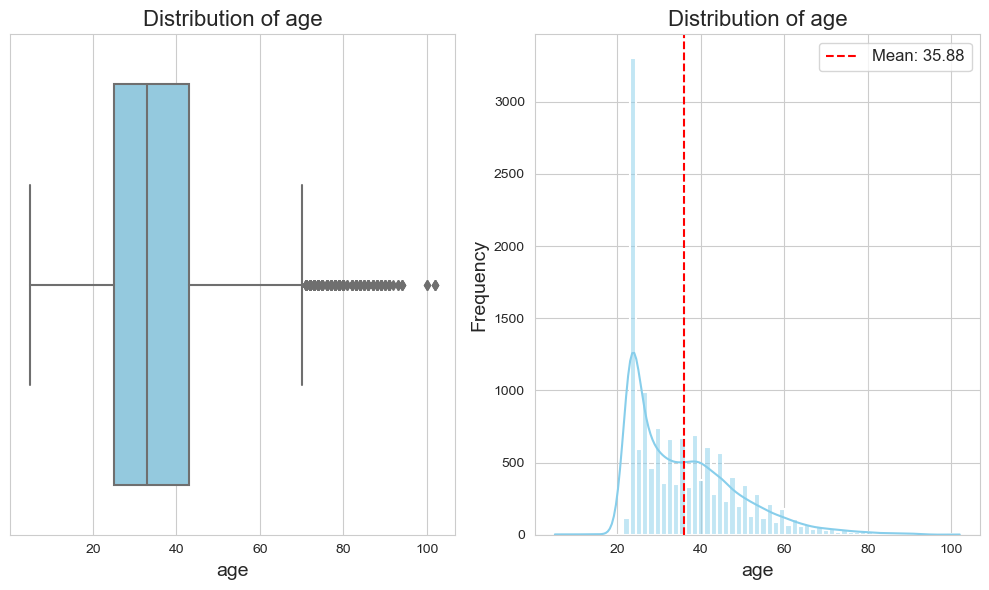

In [490]:
# Set style
sns.set_style("whitegrid")

# Set up the figure and axes
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

var = 'age'

# Box plot
sns.boxplot(x=var, data=sub_df, ax=ax[0], color='skyblue', linewidth=1.5)
ax[0].set_title(f'Distribution of {var}', fontsize=16)
ax[0].set_xlabel('age', fontsize=14)
ax[0].set_ylabel('')

# Histogram
sns.histplot(sub_df[var], kde=True, ax=ax[1], color='skyblue', linewidth=1.5)
ax[1].set_title(f'Distribution of {var}', fontsize=16)
ax[1].set_xlabel('age', fontsize=14)
ax[1].set_ylabel('Frequency', fontsize=14)

# Add mean line to histogram
mean_height = np.nanmean(sub_df[var])
ax[1].axvline(x=mean_height, color='red', linestyle='--', label=f'Mean: {mean_height:.2f}')
ax[1].legend(fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

The summary statistics, histogram, and boxplot show that the distribution of the __Age__ attribute is significantly __right-skewed__, with a __mean value (35.88)__ that exceeds the median. From the box plot, we can guess the __median value as 33__. The summary statistics also show that nearly __25%__ of the observation values of __age__ fall between __5 to 23__ and the majority of the customers fall under the age groups of __25 to 42__. Both the histogram and the boxplot show evidence of possible outliers, i.e., __age__ values that fall far beyond the upper whisker of the distribution as shown in the boxplot.

#### 2. lor_M :

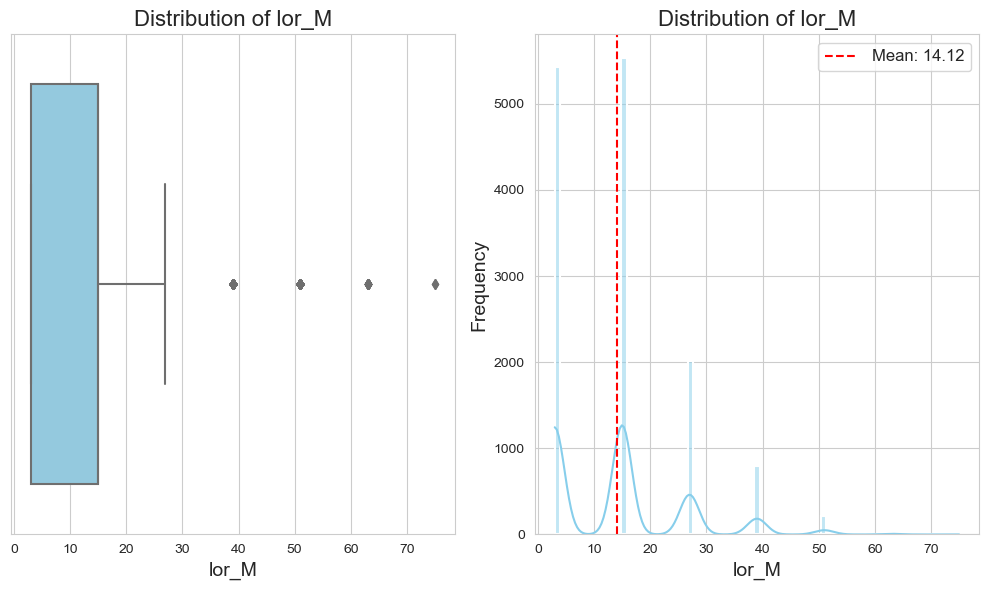

In [491]:
# Set style
sns.set_style("whitegrid")

# Set up the figure and axes
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

var = 'lor_M'

# Box plot
sns.boxplot(x=var, data=sub_df, ax=ax[0], color='skyblue', linewidth=1.5)
ax[0].set_title(f'Distribution of {var}', fontsize=16)
ax[0].set_xlabel('lor_M', fontsize=14)
ax[0].set_ylabel('')

# Histogram
sns.histplot(sub_df[var], kde=True, ax=ax[1], color='skyblue', linewidth=1.5)
ax[1].set_title(f'Distribution of {var}', fontsize=16)
ax[1].set_xlabel('lor_M', fontsize=14)
ax[1].set_ylabel('Frequency', fontsize=14)

# Add mean line to histogram
mean_height = np.nanmean(sub_df[var])
ax[1].axvline(x=mean_height, color='red', linestyle='--', label=f'Mean: {mean_height:.2f}')
ax[1].legend(fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

The summary statistics, histogram, and boxplot show that the distribution of the __lor_M__ attribute is significantly __right-skewed__, with a __mean value (14.12)__ and we can see that it is __mutlimodal__ .The majorty of the customers have __lor_M__ between __3 and 15__. Both the histogram and the boxplot show evidence of possible outliers, i.e., __lor_M__ values that fall far beyond the upper whisker of the distribution as shown in the boxplot.

#### 3. turnover_A:

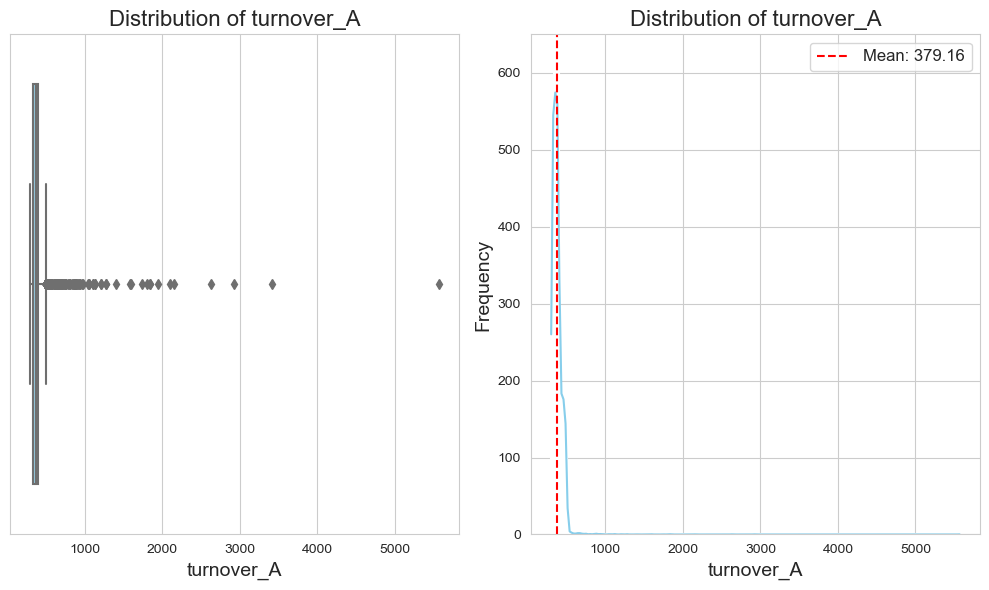

In [492]:
# Set style
sns.set_style("whitegrid")

# Set up the figure and axes
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

var = 'turnover_A'

# Box plot
sns.boxplot(x=var, data=sub_df, ax=ax[0], color='skyblue', linewidth=1.5)
ax[0].set_title(f'Distribution of {var}', fontsize=16)
ax[0].set_xlabel('turnover_A', fontsize=14)
ax[0].set_ylabel('')

# Histogram
sns.histplot(sub_df[var], kde=True, ax=ax[1], color='skyblue', linewidth=1.5)
ax[1].set_title(f'Distribution of {var}', fontsize=16)
ax[1].set_xlabel('turnover_A', fontsize=14)
ax[1].set_ylabel('Frequency', fontsize=14)

# Add mean line to histogram
mean_height = np.nanmean(sub_df[var])
ax[1].axvline(x=mean_height, color='red', linestyle='--', label=f'Mean: {mean_height:.2f}')
ax[1].legend(fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

The summary statistics, histogram, and boxplot show that the distribution of the __turnover_A__ attribute is significantly __right-skewed__, with a __mean value (379.16)__. The summary statistics also shows that the majority of the customers have spent around __300 to 500__ on product A. Both the histogram and the boxplot show evidence of possible outliers, i.e., __turnover_A__ values that fall far beyond the upper whisker of the distribution as shown in the boxplot.

#### 4. turnover_B

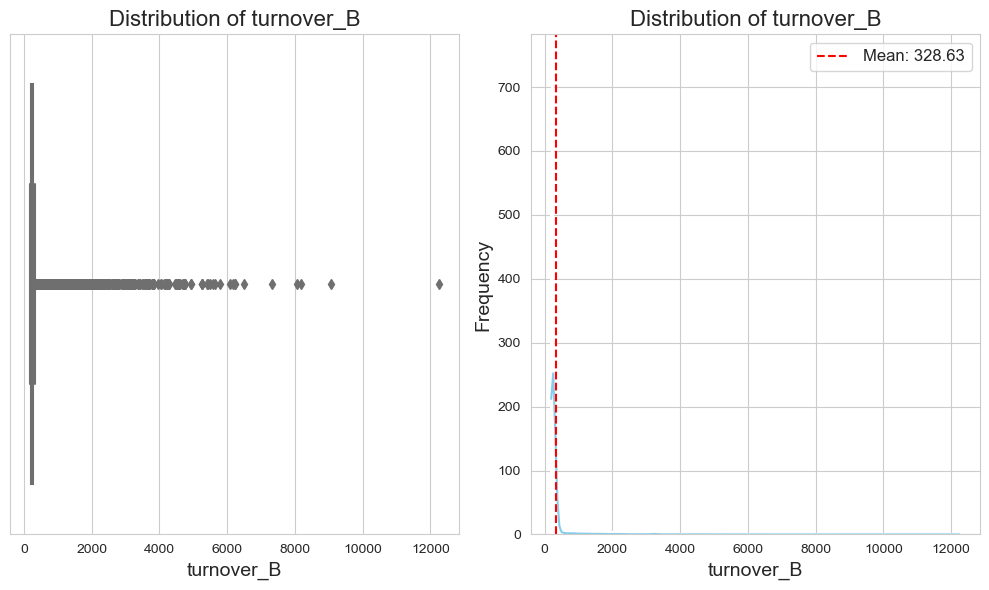

In [493]:
# Set style
sns.set_style("whitegrid")

# Set up the figure and axes
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

var = 'turnover_B'

# Box plot
sns.boxplot(x=var, data=sub_df, ax=ax[0], color='skyblue', linewidth=1.5)
ax[0].set_title(f'Distribution of {var}', fontsize=16)
ax[0].set_xlabel('turnover_B', fontsize=14)
ax[0].set_ylabel('')

# Histogram
sns.histplot(sub_df[var], kde=True, ax=ax[1], color='skyblue', linewidth=1.5)
ax[1].set_title(f'Distribution of {var}', fontsize=16)
ax[1].set_xlabel('turnover_B', fontsize=14)
ax[1].set_ylabel('Frequency', fontsize=14)

# Add mean line to histogram
mean_height = np.nanmean(sub_df[var])
ax[1].axvline(x=mean_height, color='red', linestyle='--', label=f'Mean: {mean_height:.2f}')
ax[1].legend(fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

The summary statistics, histogram, and boxplot show that the distribution of the __turnover_B__ attribute is significantly __right-skewed__, with a __mean value (328.63)__. The summary statistics also shows that the majority of the customers have spent around __100 to 300__ on product B. Both the histogram and the boxplot show evidence of possible outliers, i.e., __turnover_B__ values that fall far beyond the upper whisker of the distribution as shown in the boxplot.

#### Summary Statistics of Categorical Data:
1. TARGET
2. type_A
3. type_B

In [494]:
sub_df[['TARGET','type_A','type_B']].astype("object").describe()

,TARGET,type_A,type_B
count,14016,14016,14016
unique,2,3,4
top,0,3,3
freq,8000,7452,7874


1. __TARGET__:

- Count: There are 14,016 non-null values for TARGET.
- unique: the no of unique values are 2.
- top: The value which has the highest frequency is __0__.
- freq: The frequency of the top value is __8000__.

2. __type_A__:

- Count: There are 14,016 non-null values for type_A.
- unique: the no of unique values are 3.
- top: The value which has the highest frequency is __3__.
- freq: The frequency of the top value is __7452__.

3. __type_B__:

- Count: There are 14,016 non-null values for type_B.
- unique: the no of unique values are 4.
- top: The value which has the highest frequency is __8__.
- freq: The frequency of the top value is __7874__.


#### Univariate Analysis  of Categorical Data:

#### 1. TARGET

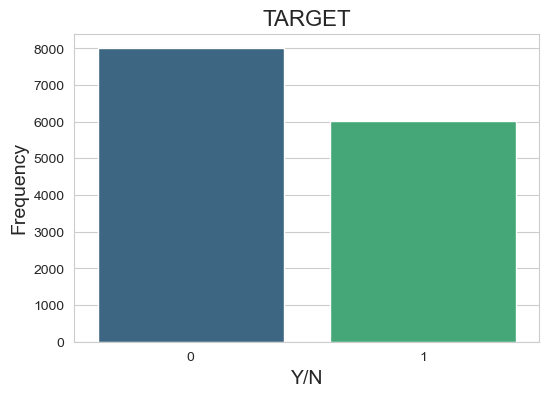

In [495]:
palette = sns.color_palette("viridis", len(sub_df['TARGET'].value_counts()))

# Mapping the 'TARGET' values to colors
value_counts = sub_df['TARGET'].value_counts()
colors = {value: palette[i] for i, value in enumerate(value_counts.index)}

# Plotting the distribution of 'TARGET' with the fixed palette
plt.figure(figsize=(6,4))
sns.countplot(x='TARGET', data=sub_df, palette=colors)
plt.title('TARGET', fontsize=16)
plt.xlabel('Y/N', fontsize=14)  # Add x-axis label
plt.ylabel('Frequency', fontsize=14)  # Add y-axis label
plt.show()

The results show us that there are 2 unique values within the __TARGET__ attribute.The data dictionary lists ('N' = No = 0; 'Y' = Yes = 1). The summary statistics, Bar graph shows that frequency of the customers who didn't purchase the new product is high in the __TARGET__ attribute.

#### 2. type_A

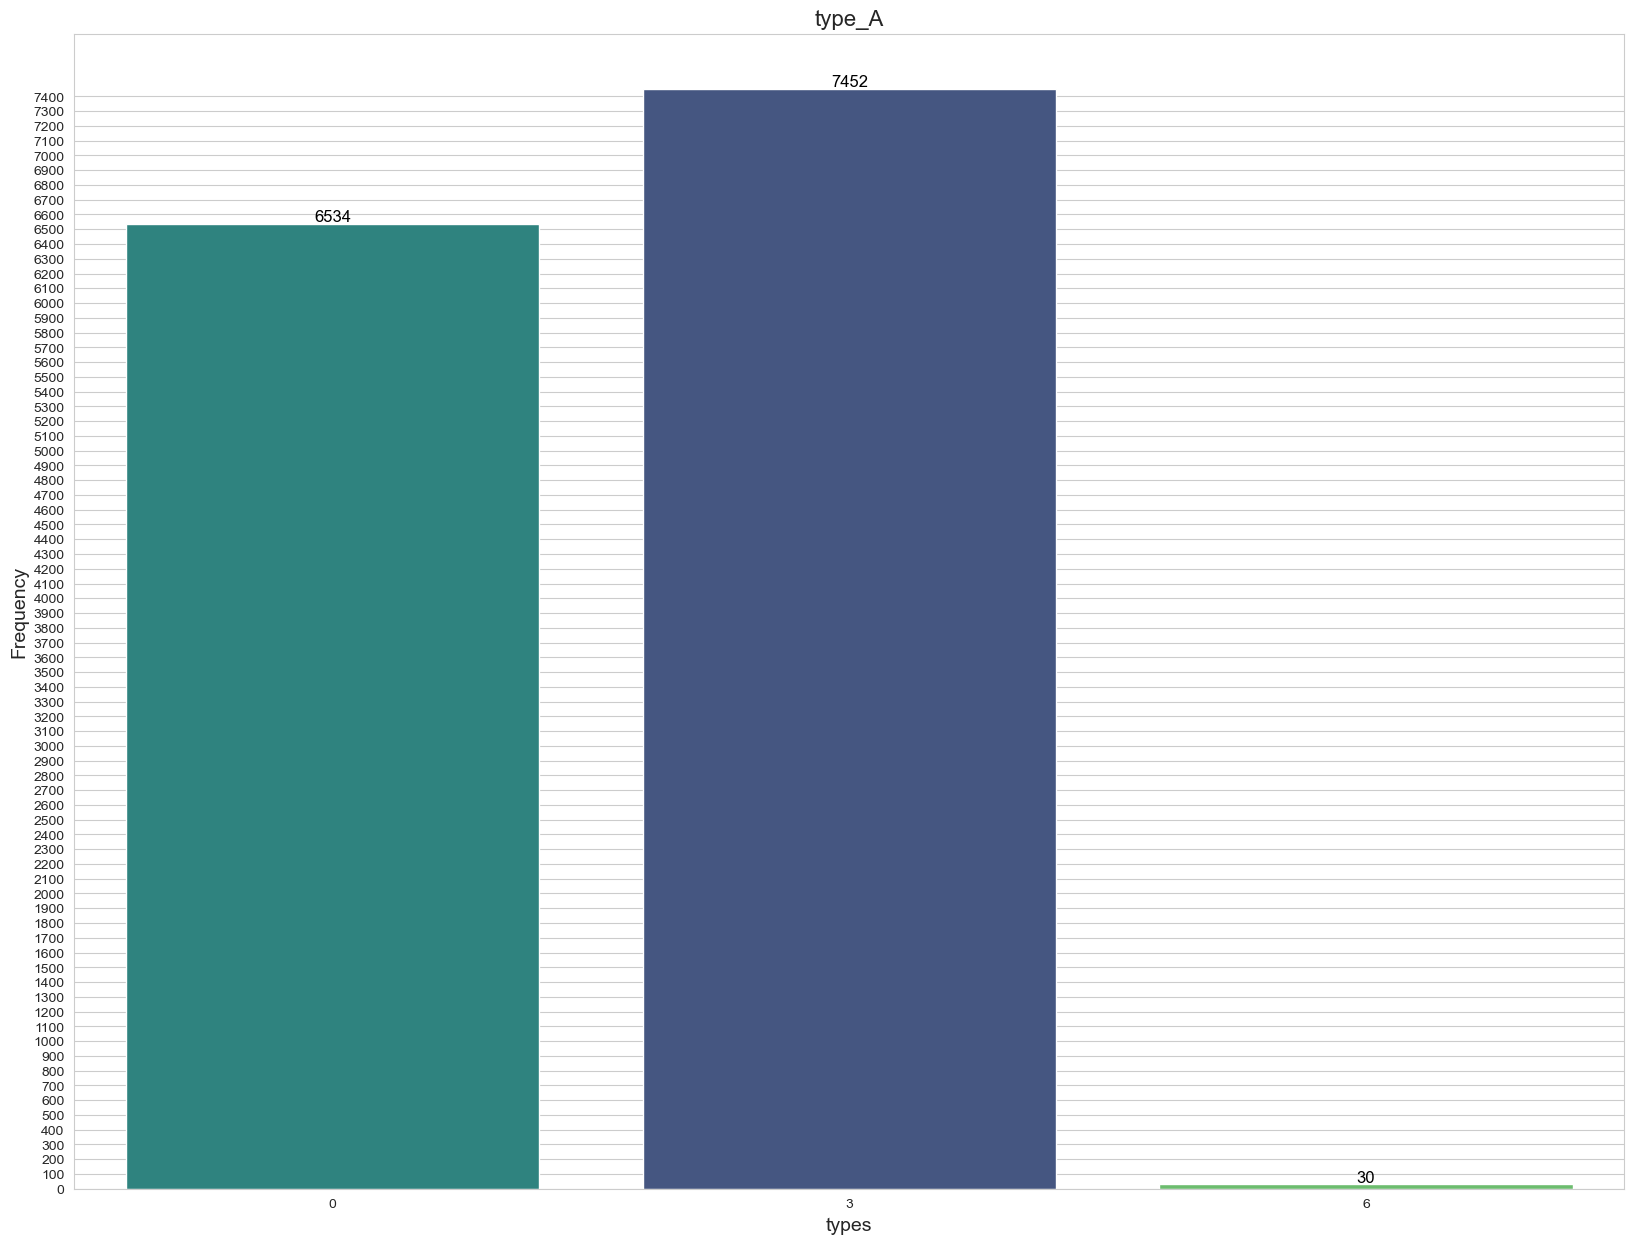

In [496]:
palette = sns.color_palette("viridis", len(sub_df['type_A'].value_counts()))

# Mapping the 'type_A' values to colors
value_counts = sub_df['type_A'].value_counts()
colors = {value: palette[i] for i, value in enumerate(value_counts.index)}
    
# Plotting the distribution of 'type_A' with the fixed palette
plt.figure(figsize=(20,15))
sns.countplot(x='type_A', data=sub_df, palette=colors)

# Annotate each bar with the count value
for p in plt.gca().patches:
    plt.gca().annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), 
                       textcoords='offset points')
    
plt.title('type_A', fontsize=16)
plt.xlabel('types', fontsize=14)  # Add x-axis label
plt.ylabel('Frequency', fontsize=14)  # Add y-axis label

# Set the y-axis ticks to 100's
plt.yticks(range(0, max(value_counts)+1 , 100))

plt.show()

The results show us that there are 3 unique values within the __type_A__ attribute.The data dictionary lists ('0','3' and '6'). The summary statistics, Bar graph shows that frequency of the customers who purchased the product type _3_ is the highest in the __type_A__ attribute and product type _6_ is purchased by very few customers.

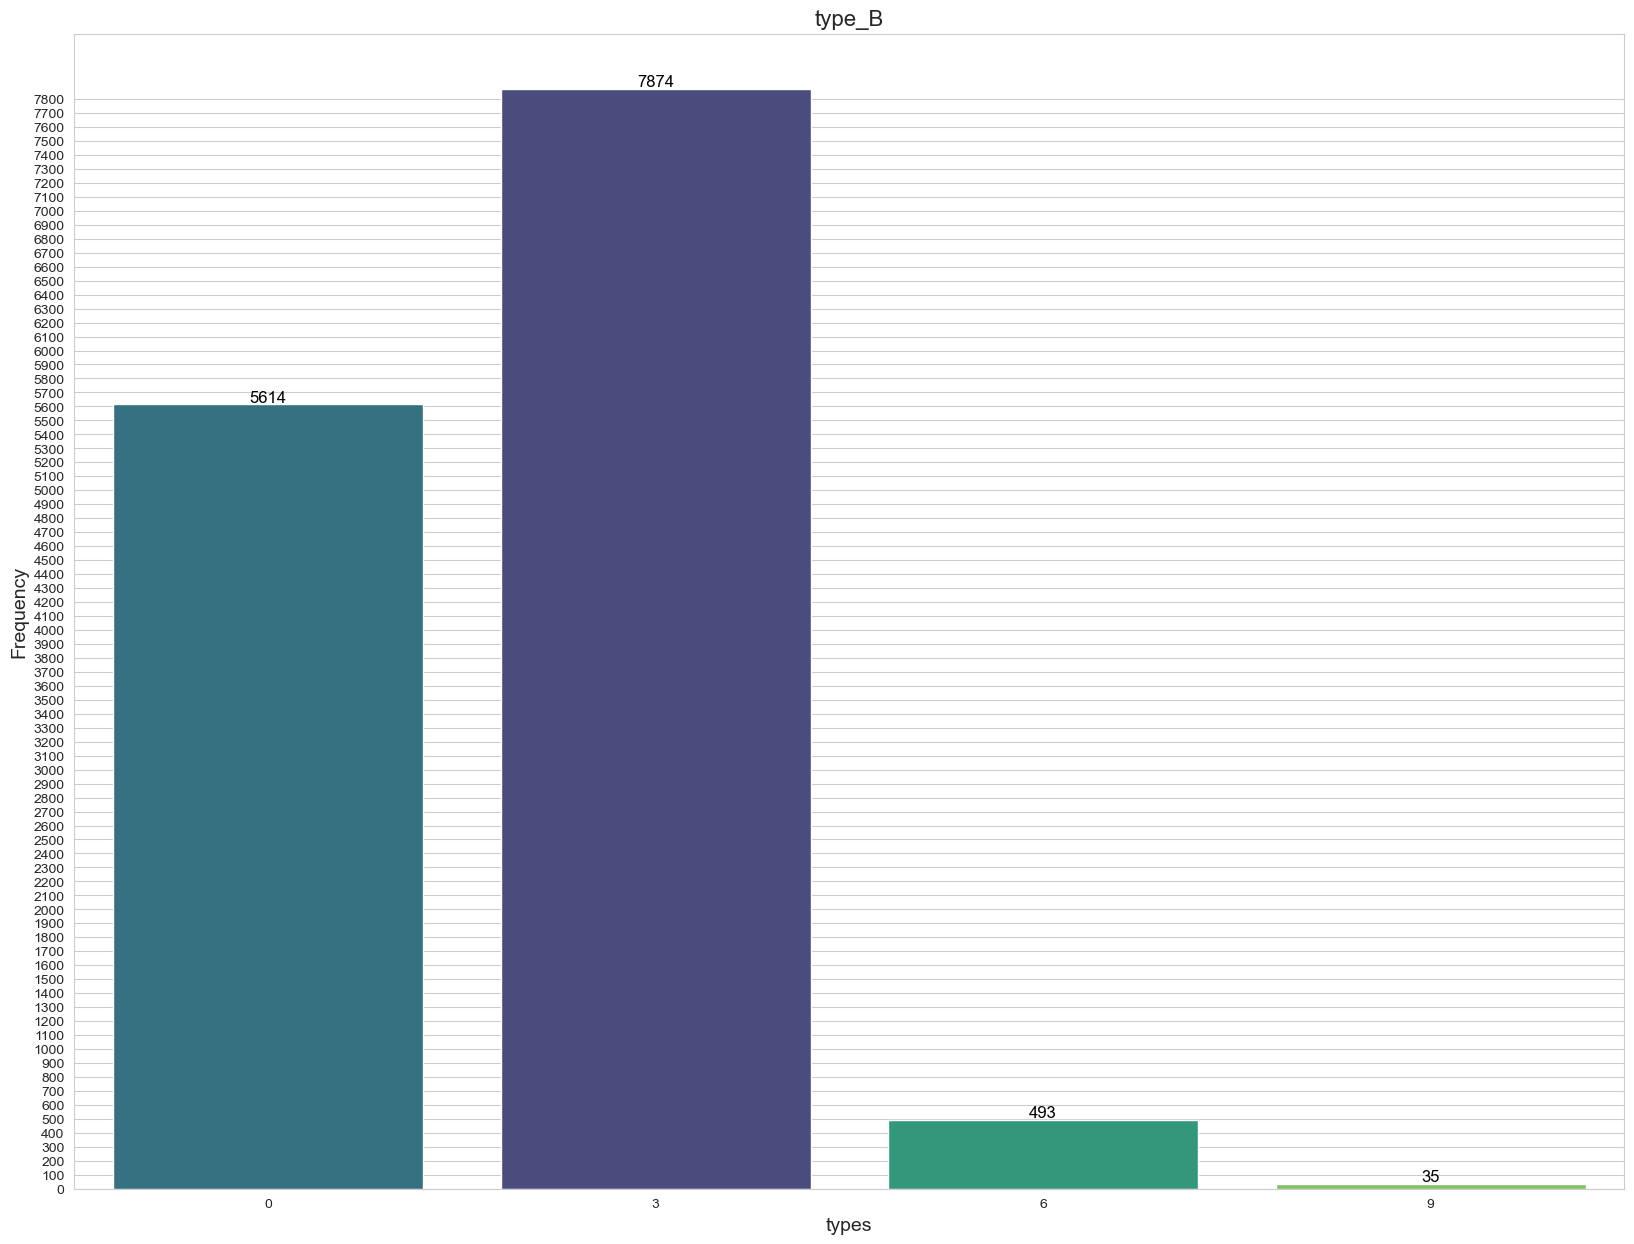

In [497]:
palette = sns.color_palette("viridis", len(sub_df['type_B'].value_counts()))

# Mapping the 'type_B' values to colors
value_counts = sub_df['type_B'].value_counts()
colors = {value: palette[i] for i, value in enumerate(value_counts.index)}

# Plotting the distribution of 'type_B' with the fixed palette
plt.figure(figsize=(20,15))
sns.countplot(x='type_B', data=sub_df, palette=colors)

# Annotate each bar with the count value
for p in plt.gca().patches:
    plt.gca().annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), 
                       textcoords='offset points')
    
plt.title('type_B', fontsize=16)
plt.xlabel('types', fontsize=14)  # Add x-axis label
plt.ylabel('Frequency', fontsize=14)  # Add y-axis label

# Set the y-axis ticks to 100's
plt.yticks(range(0, max(value_counts) + 1, 100))

plt.show()

The results show us that there are 4 unique values within the __type_B__ attribute.The data dictionary lists ('0','3','6' and '9'). The summary statistics, Bar graph shows that frequency of the customers who purchased the product type _3_ is the highest in the __type_A__ attribute and product type _9_ is purchased by very few customers.

#### Bivariate Analysis
#### 1. TARGET(Categorical)  vs.  Age(Numerical)

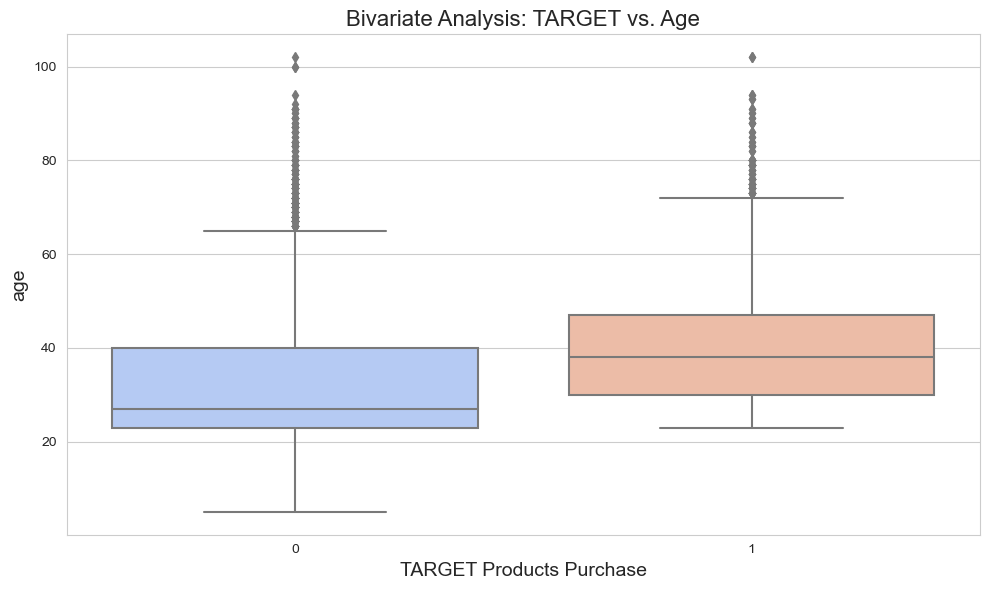

In [498]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Plotting the bivariate analysis
sns.boxplot(x='TARGET', y='age', data=sub_df, palette='coolwarm')
plt.title('Bivariate Analysis: TARGET vs. Age', fontsize=16)
plt.xlabel('TARGET Products Purchase', fontsize=14)
plt.ylabel('age', fontsize=14)
#plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

Summary Statistics and Insights from Plot:

1. Customers who didn’t purchase the new product (0):
- The __median__ age is around __27__.
- The majority of customers ages fall between __22 and 40__.
- The __outliers__ are up to the age of __102__.
2. Customers who purchased the new product (1):
- The __median__ age is slightly higher compared to the median age of the customers who didn't purchase the product, around __38__.
- The majority of customers ages fall between __30 and 50__.
- The outliers are less compared to the customers who didn't purchse the product.

The boxplot shows evidence of a huge number of possible outliers, i.e., __age__ values that fall far beyond the upper whisker of the distribution as shown in the boxplot.

Over here we come to an inference that the Older customers are showing mostly interested in purchasing the new products.
However, it is clearly visible that the age groups of the customers who are purchasing and not purchasing products are overlapped. This indicates that age alone might not be sufficient to make the prediction whether the customer will take the new product or not. 

#### 2. TARGET(Categorical)  vs.  type_A(Categorical)

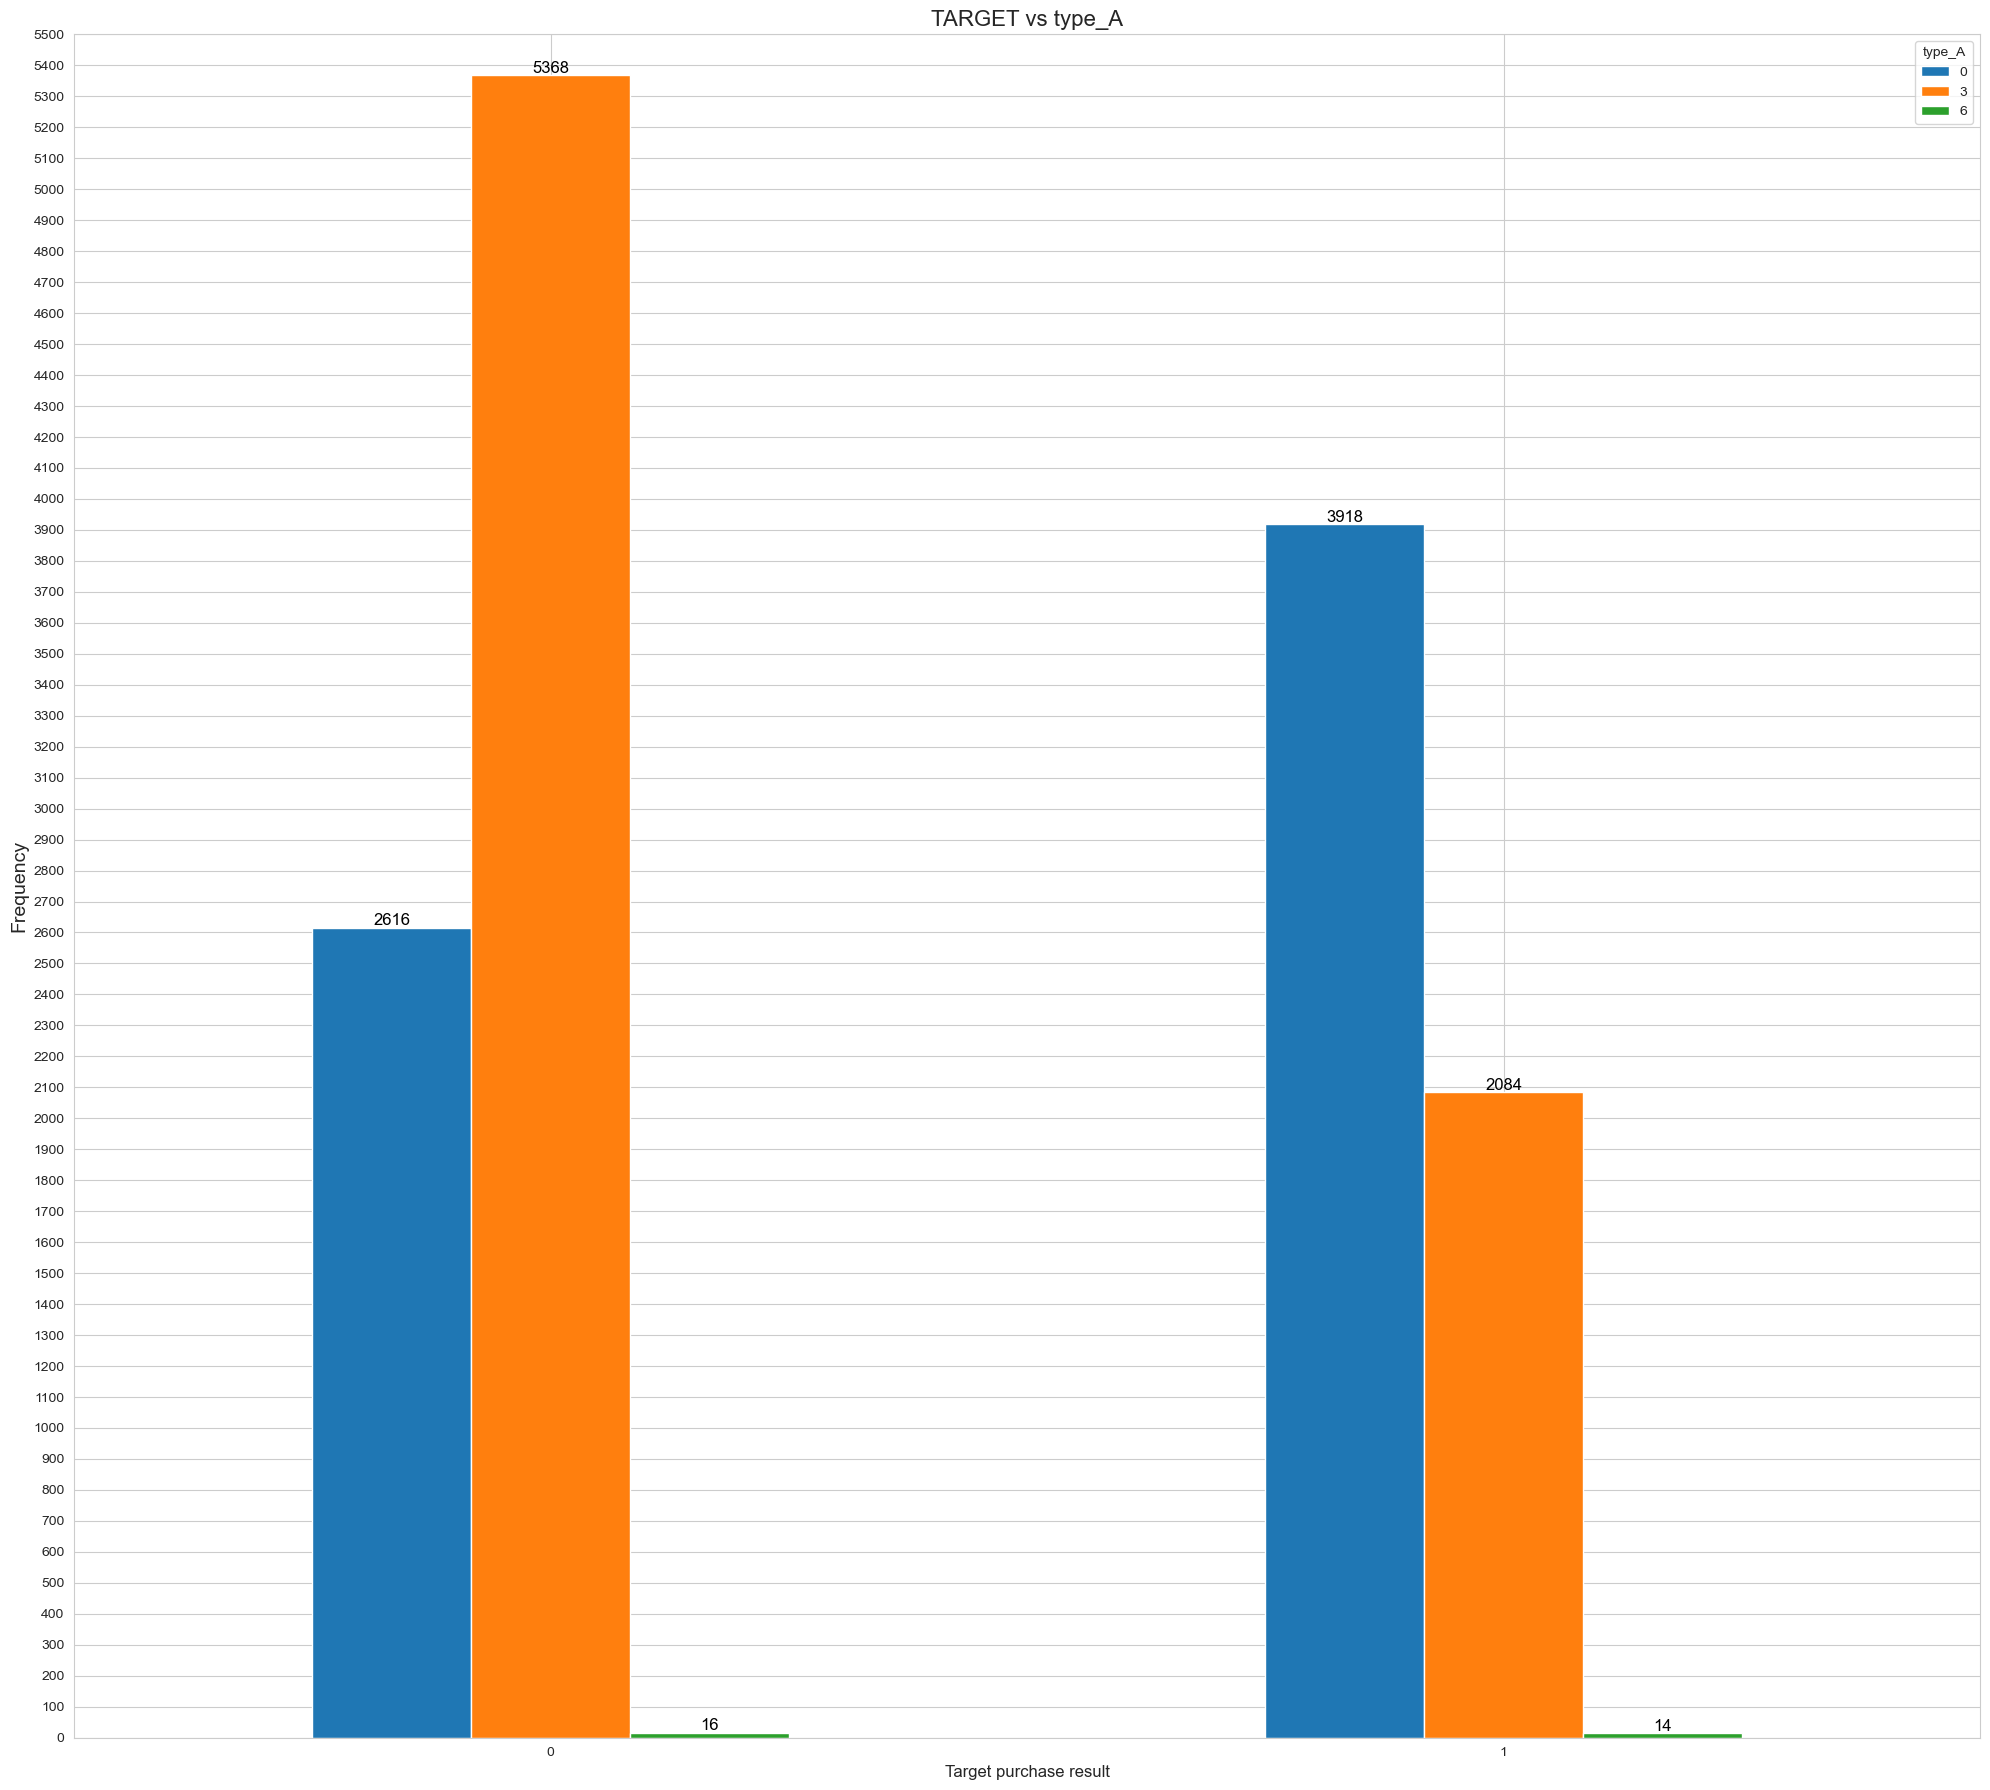

In [499]:

CrosstabResult=pd.crosstab(index=sub_df['TARGET'],columns=sub_df['type_A'])

CrosstabResult.plot.bar(figsize=(20,18), rot=0)

# Annotate each bar with the count value
for p in plt.gca().patches:
    plt.gca().annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), 
                       textcoords='offset points')
    

plt.title('TARGET vs type_A', fontsize=16)
plt.xlabel('Target purchase result', fontsize=12)
plt.ylabel('Frequency', fontsize=14)

# Set the y-axis ticks to 100's
plt.yticks(range(0, max(value_counts) + 1, 100))

# Set the y-axis limit to 5500
plt.ylim(0, 5500)

plt.tight_layout()
plt.show()

Summary Statistics and Insights from Plot:

1. Customers who didn’t purchase the new product (0):
- The __type 3 products__ are purchased most here followed by the __type 0__.
- The purchase of type 3 products is more than double the purchase of type 0 products.
- The type 6 product has the least significance in this.
2. Customers who purchased the new product (1):
- The __type 0 products__ are purchased most here followed by the __type 3__.
- The purchase of type 0 products is almost double the purchase of type 0 products.
- The type 6 product has the least significance in this.

Over here we come to an inference that the customers who purchased __type 3__ products might not be satisfied and are not purchasing the new product. Where as, on the other hand customers who purchased more number of __type 0__ products are showing more interest in purchasing the new products.

#### 3. TARGET(Categorical)  vs.  type_B(Categorical)

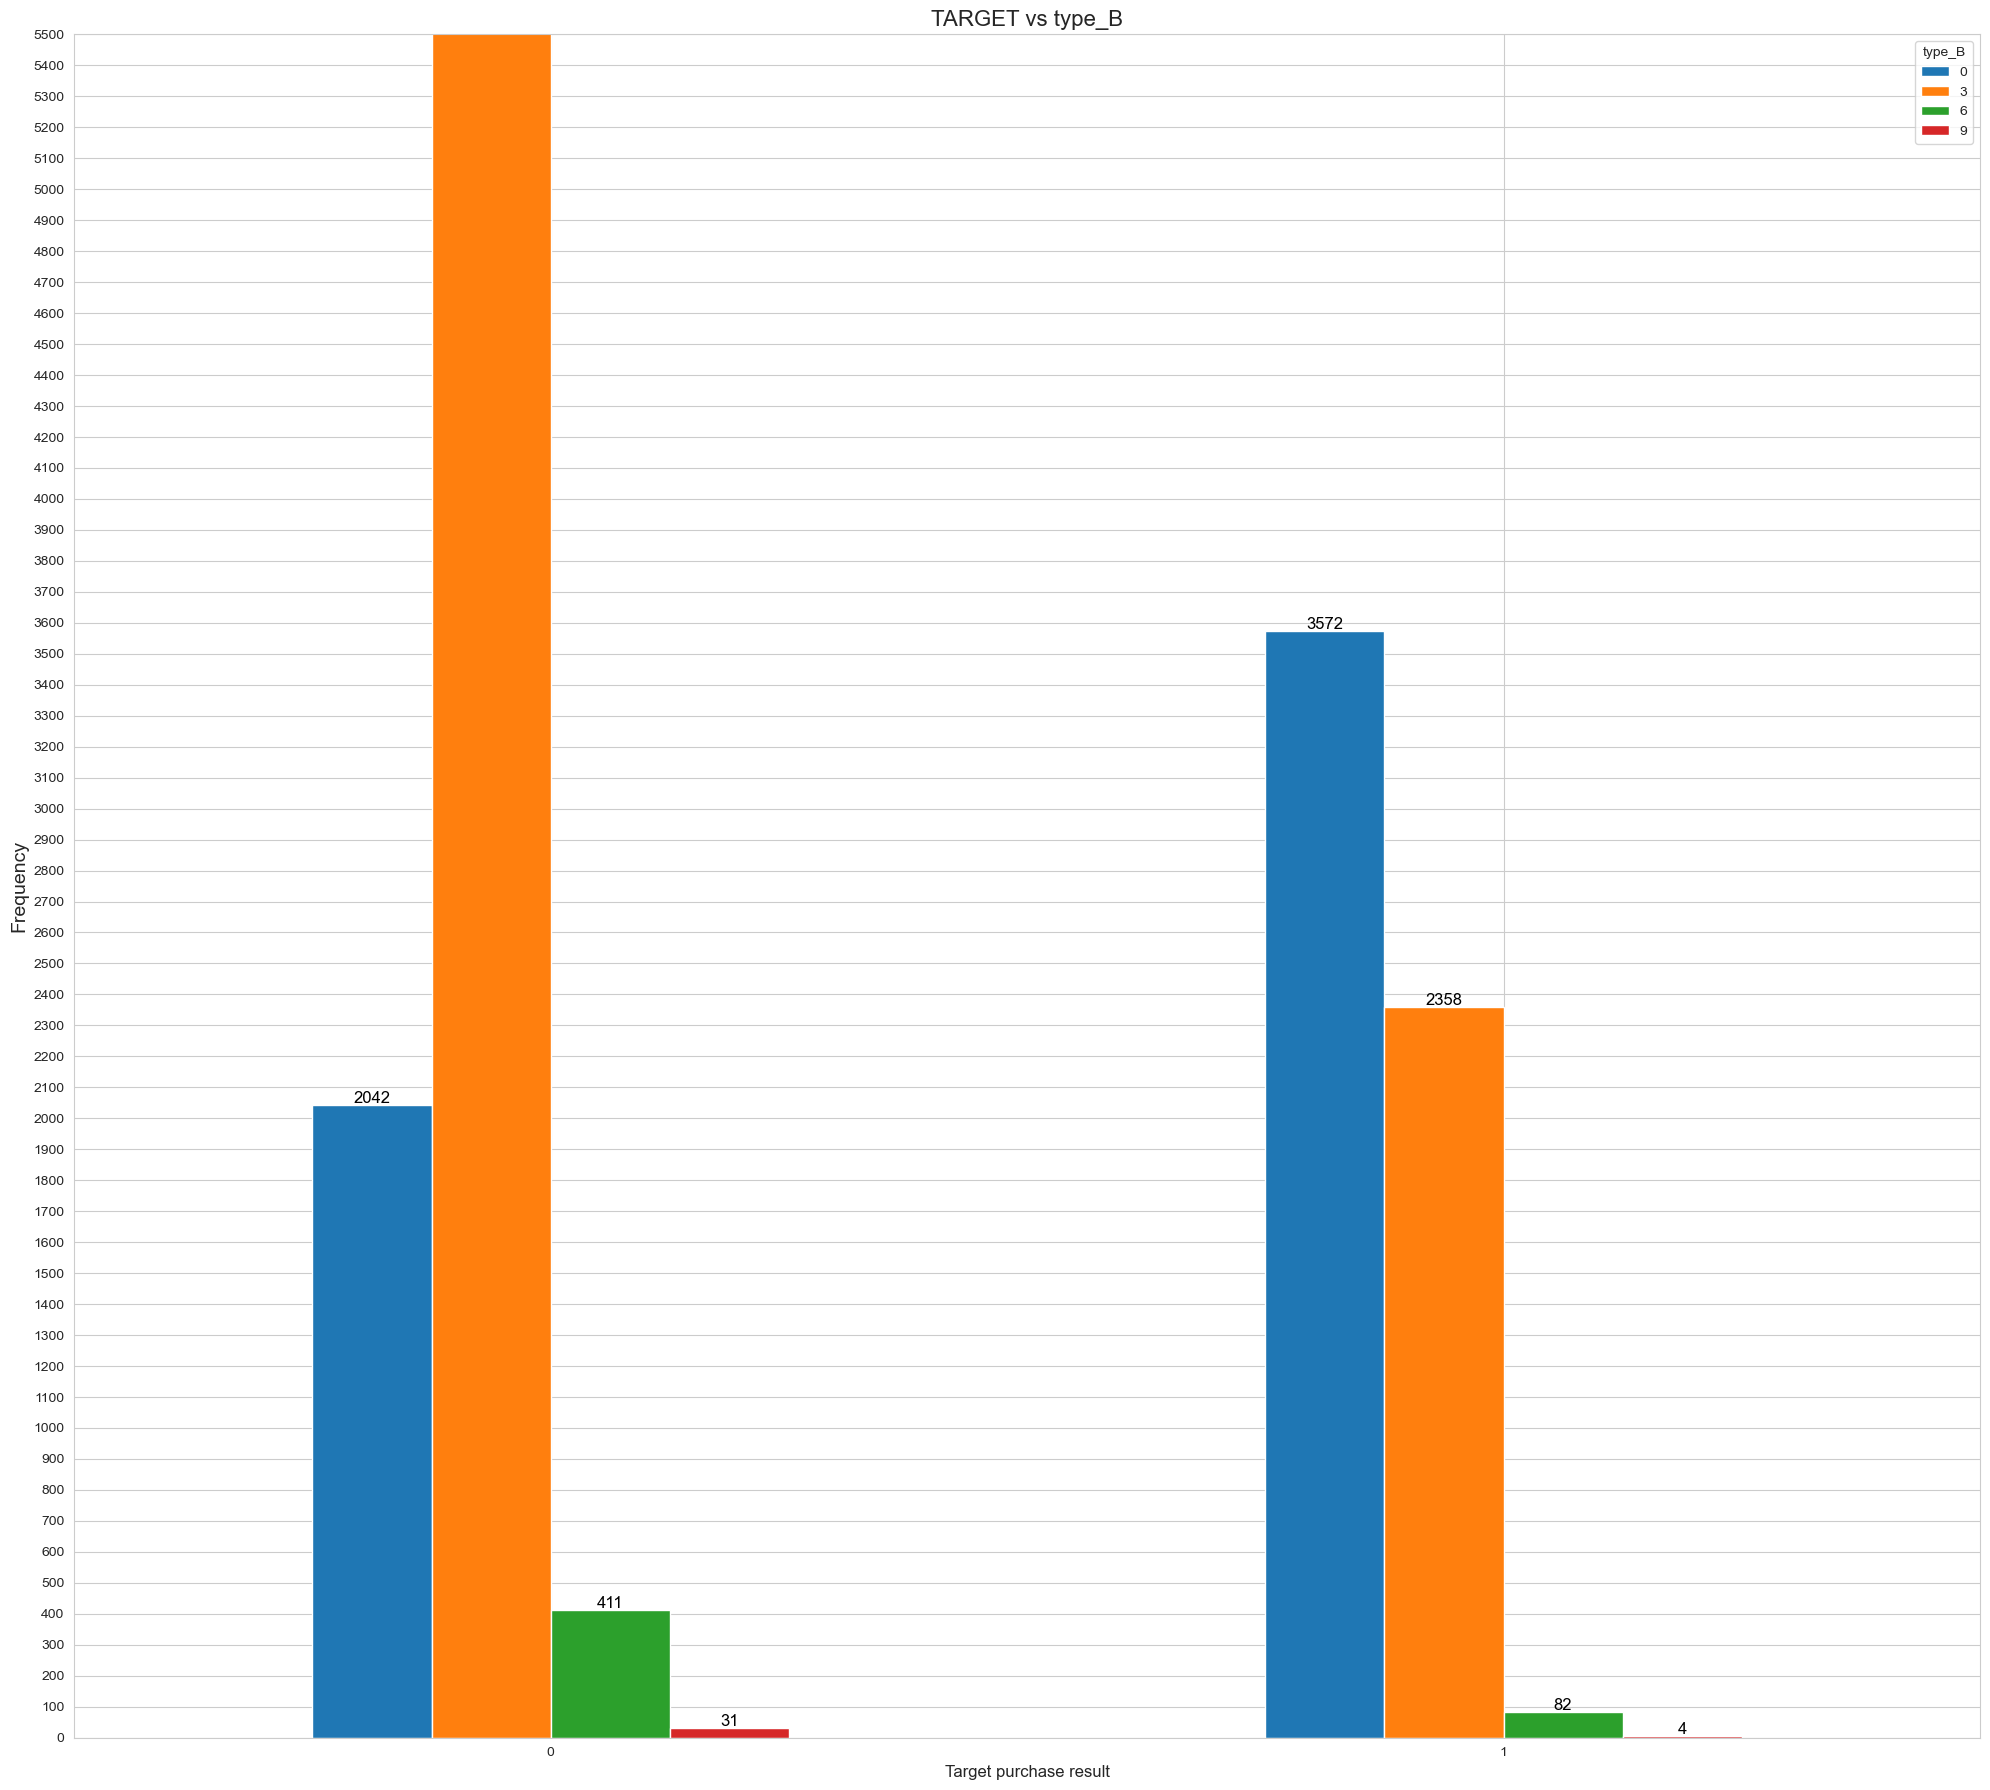

In [500]:
CrosstabResult=pd.crosstab(index=sub_df['TARGET'],columns=sub_df['type_B'])

CrosstabResult.plot.bar(figsize=(20,18), rot=0)

# Annotate each bar with the count value
for p in plt.gca().patches:
    plt.gca().annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), 
                       textcoords='offset points')
    

plt.title('TARGET vs type_B', fontsize=16)
plt.xlabel('Target purchase result', fontsize=12)
plt.ylabel('Frequency', fontsize=14)

# Set the y-axis ticks to 100's
plt.yticks(range(0, max(value_counts) + 1, 100))

# Set the y-axis limit to 5500
plt.ylim(0, 5500)

plt.tight_layout()
plt.show()

Summary Statistics and Insights from Plot:

1. Customers who didn’t purchase the new product (0):
- The __type 3 products__ are purchased most here followed by the __type 0__.
- The purchase of type 3 products is more than double the purchase of type 0 products.
- The type 6 and 9 products has the least significance in this.
2. Customers who purchased the new product (1):
- The __type 0 products__ are purchased most here followed by the __type 3__.
- The type 6 and 9 products has the least significance in this.

Over here we come to an inference that the customers who purchased __type 3__ products might not be satisfied and are not purchasing the new product. Where as, on the other hand customers who purchased more number of __type 0__ products are showing more interest in purchasing the new products.

#### 4. TARGET(Categorical)  vs.  lor_M(Numerical)

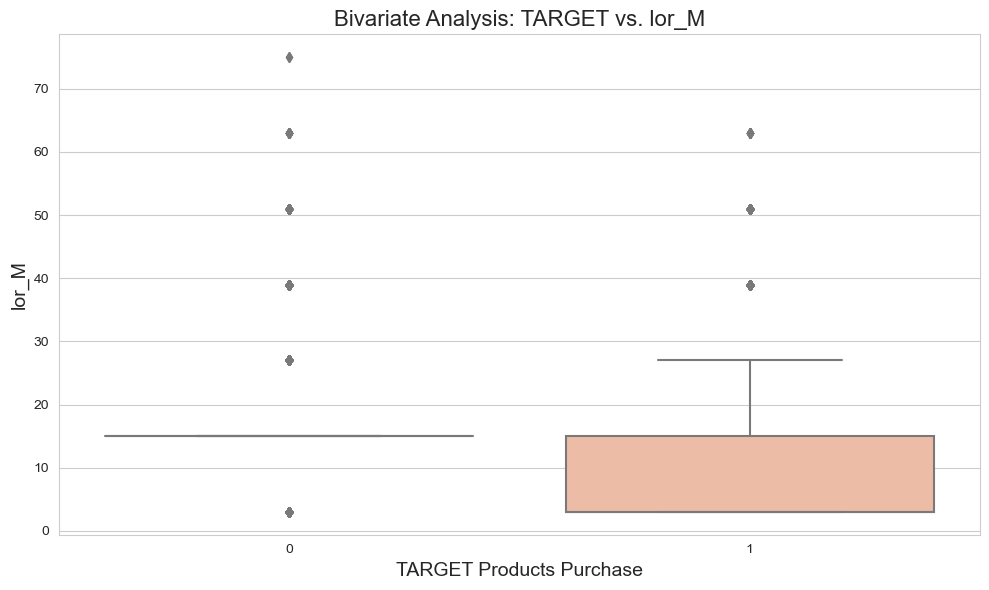

In [501]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Plotting the bivariate analysis
sns.boxplot(x='TARGET', y='lor_M', data=sub_df, palette='coolwarm')
plt.title('Bivariate Analysis: TARGET vs. lor_M', fontsize=16)
plt.xlabel('TARGET Products Purchase', fontsize=14)
plt.ylabel('lor_M', fontsize=14)
#plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

Summary Statistics and Insights from Plot:

1. Customers who didn’t purchase the new product (0):
- It has so many outliers.
- The data values are mostly focused/spread on one value which is around __15__.
- We can see no spread of data and no whiskers over here.
2. Customers who purchased the new product (1):
- The outliers are less compared to the customers who didn't purchase the new product.
- The majority of customers have __3 to 15 months__ of relationship with the company.
- The Upper whisker runs upto __28 months__. 

Over here we come to an inference that the customers with a relationship length of __3 to 15 months__ are mostly interested in purchasing the new products. This indicates that the length of the relationship might be sufficient to make the prediction.

#### 5. TARGET(Categorical)  vs.  turnover_A(Numerical)

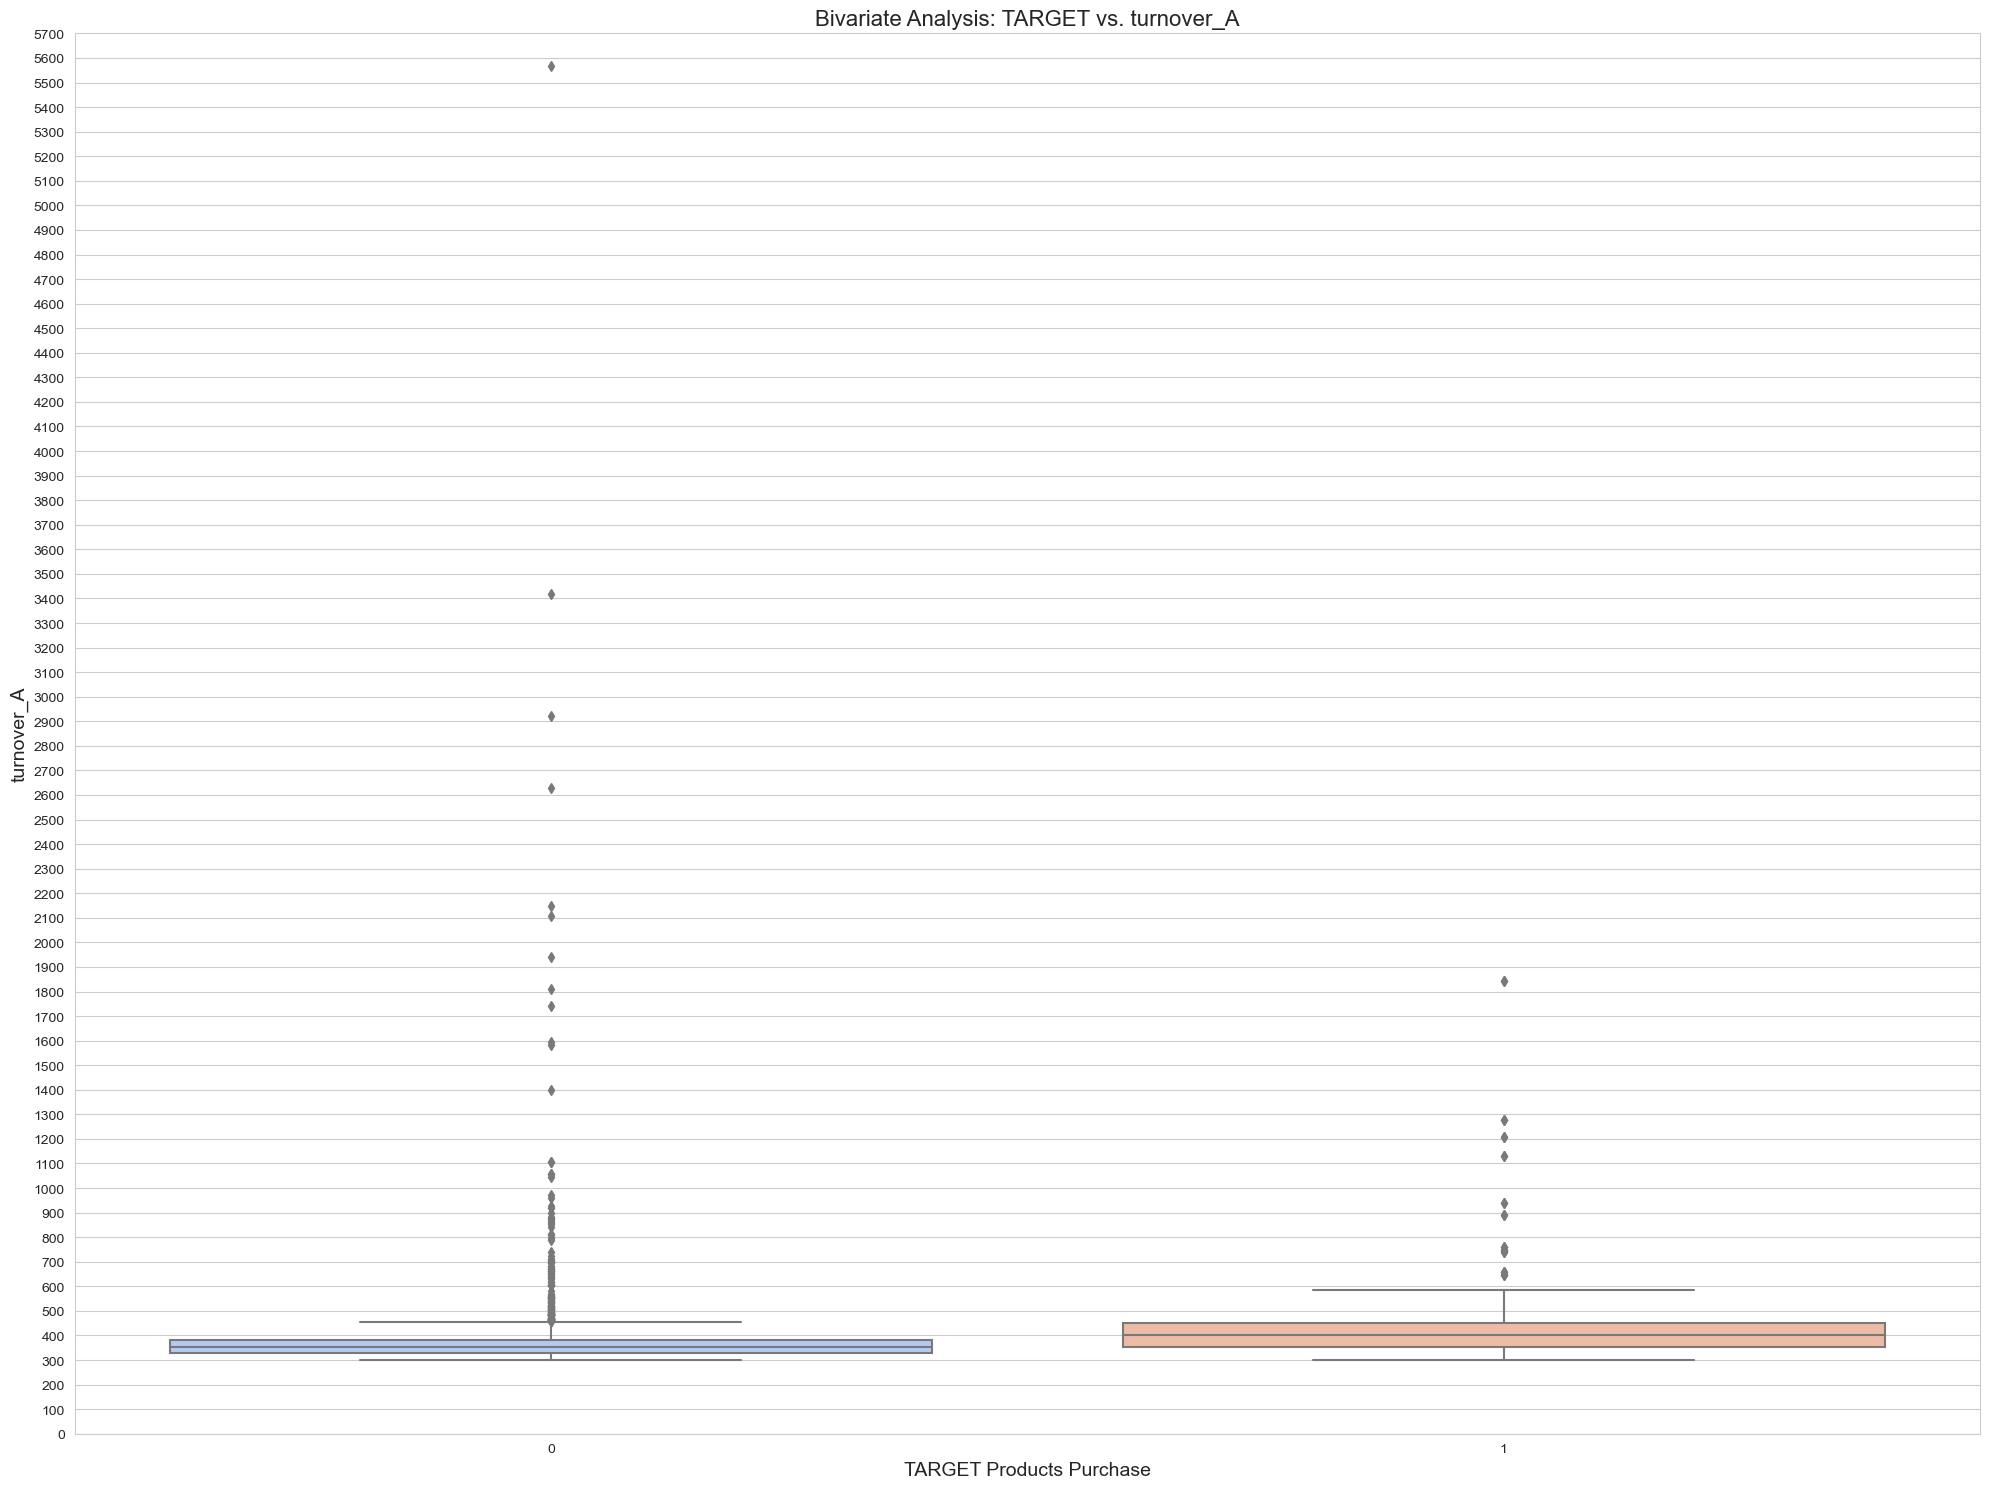

In [502]:
# Set the figure size
plt.figure(figsize=(20,15))

# Plotting the bivariate analysis
sns.boxplot(x='TARGET', y='turnover_A', data=sub_df, palette='coolwarm')
plt.title('Bivariate Analysis: TARGET vs. turnover_A', fontsize=16)
plt.xlabel('TARGET Products Purchase', fontsize=14)
plt.ylabel('turnover_A', fontsize=14)

# Set the y-axis ticks to 100's
plt.yticks(range(0, max(value_counts) + 1, 100))

# Set the y-axis limit to 5500
plt.ylim(0, 5700)

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

Summary Statistics and Insights from Plot:

1. Customers who didn’t purchase the new product (0):
- It has many outliers and it ranges from __460 to 5600__ turnover.
- The data values are mostly focused/spread around __350 to 390__ turnover.
- We can see the spread of data and whiskers around __300 to 490__ turnover.
2. Customers who purchased the new product (1):
- The outliers and its spread is less compared to the customers who didn't purchase the new product.
- The majority of customers have made __350 to 450 turnover__ for the company.
- We can see the spread of data and whiskers around __300 to 600__ turnover.

Over here we come to an inference that the customers who spent more on the product A are most likely to purchase the new product.

#### 6. TARGET(Categorical)  vs.  turnover_B(Numerical)

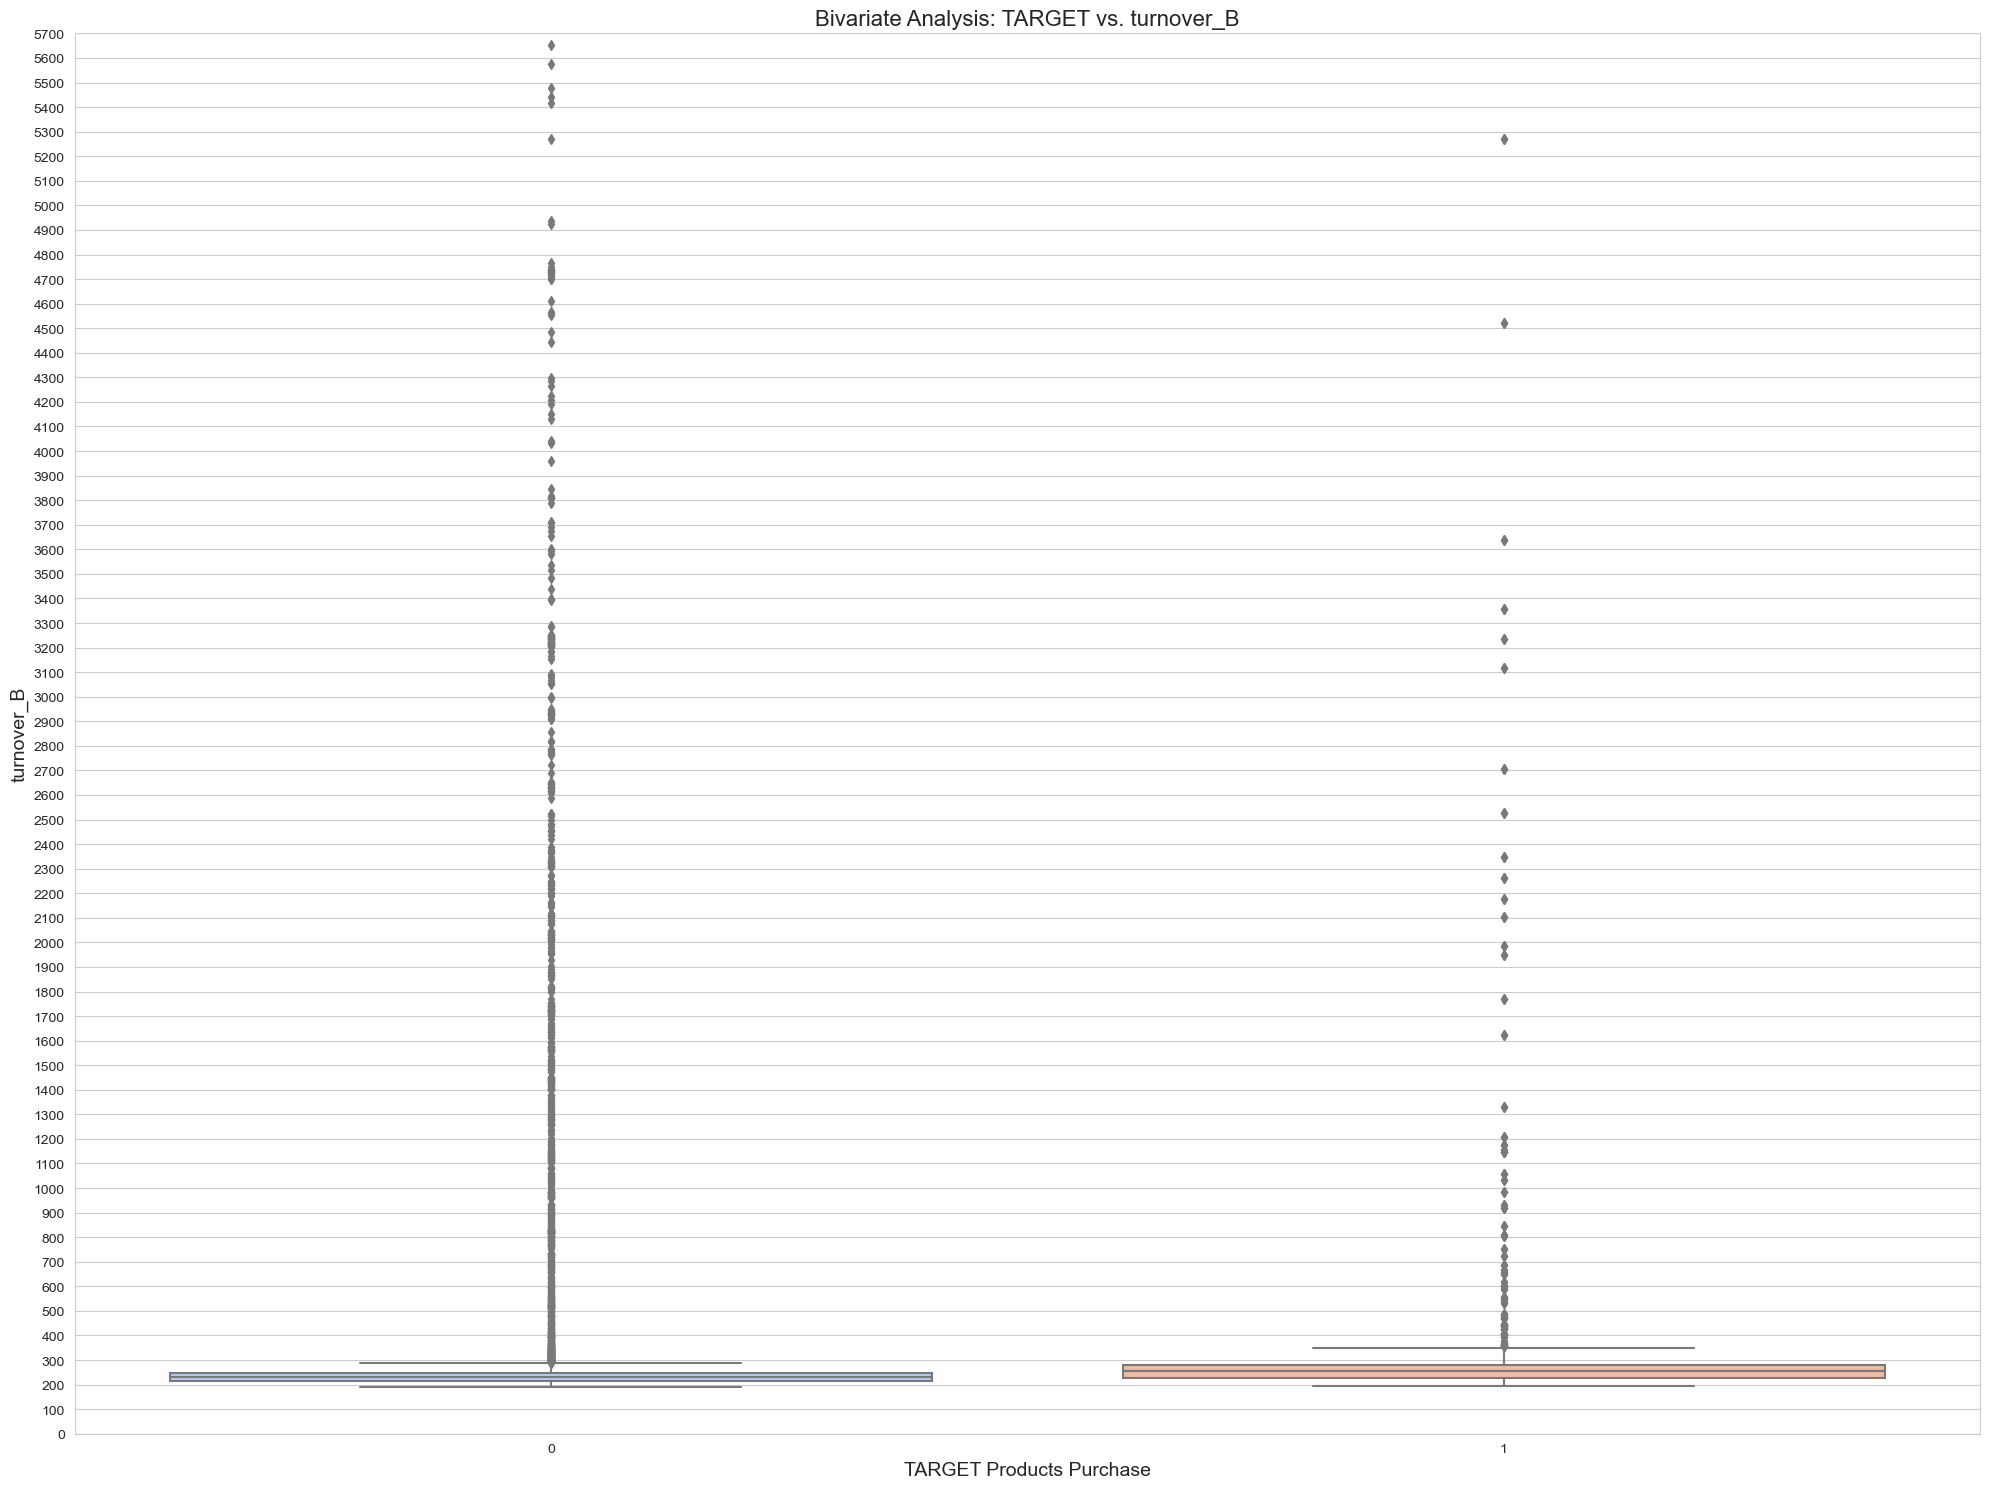

In [503]:
# Set the figure size
plt.figure(figsize=(20, 15))

# Plotting the bivariate analysis
sns.boxplot(x='TARGET', y='turnover_B', data=sub_df, palette='coolwarm')
plt.title('Bivariate Analysis: TARGET vs. turnover_B', fontsize=16)
plt.xlabel('TARGET Products Purchase', fontsize=14)
plt.ylabel('turnover_B', fontsize=14)

# Set the y-axis ticks to 100's
plt.yticks(range(0, max(value_counts) + 1, 100))

# Set the y-axis limit to 5500
plt.ylim(0, 5700)

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

Summary Statistics and Insights from Plot:

1. Customers who didn’t purchase the new product (0):
- It has many outliers and it ranges from __300 to 5700__ turnover.
- The data values are mostly focused/spread around __210 to 250__ turnover.
- We can see the spread of data and whiskers around __200 to 300__ turnover.
2. Customers who purchased the new product (1):
- The outliers and its spread is less compared to the customers who didn't purchase the new product.
- The majority of customers have made __220 to 380 turnover__ for the company.
- We can see the spread of data and whiskers around __200 to 350__ turnover.

Over here we come to an inference that the customers who spent more on the product B are most likely to purchase the new product.

--------------------------------------------
### 6. Preliminary Conclusions:

The __turnover_A__ and __turnover_B__ columns might be helpful in n predicting whether a specific customer is likely to purchase an additional product. When a customer spends his amount on the product and if the customer is satisfied with it he will purchase that particular product again hence the turnover of that product increases. Then automatically the customer will show his interest in the new product and there would be higher chances of him purchasing the new product. Hence, accordingly the probability of the customer purchasing the new product increases. Thus, aside from __TARGET__, we can use __turnover_A__ and __turnover_B__ for the prediction of customer behavior.


-------------------------------------------------
### 7.  Feature Engineering

-  __We create a dummy indicator for both 'Type_A' and 'Type_B' categorical variable__: 
- The new dummy variables are the values in the original column with the prefix of that particular column.
- Over here, in __type_A__ varibale we have three values __0,3 and 6__ for these three values seperate columns are created using the __get_dummies()__ in pandas.
- Same is performed with the __type_B__ variable which has four values __0,3,6, and 9__.

In [539]:
dummies_A = pd.get_dummies(sub_df['type_A'], prefix='type_A',dtype=int)
dummies_B = pd.get_dummies(sub_df['type_B'], prefix='type_B',dtype=int)

# Drop the original 'Type_A' and 'Type_B' columns from df
sub_df = sub_df.drop(['type_A', 'type_B'], axis=1)

# Concatenate the original DataFrame with the dummy DataFrame
sub_df_dummy = pd.concat([sub_df, dummies_A, dummies_B], axis=1)
sub_df_dummy

,TARGET,age,lor_M,turnover_A,turnover_B,type_A_0,type_A_3,type_A_6,type_B_0,type_B_3,type_B_6,type_B_9
0,1,66,3,333.561114,264.721010,1,0,0,1,0,0,0
1,1,45,39,394.735699,284.904978,0,1,0,0,1,0,0
2,1,42,27,342.180990,1175.589721,0,1,0,0,0,1,0
3,1,31,3,453.757916,242.341754,1,0,0,1,0,0,0
4,1,62,3,384.577469,287.008370,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
14011,1,30,3,386.434278,284.309508,1,0,0,1,0,0,0
14012,1,27,27,376.842591,266.993794,0,1,0,0,1,0,0
14013,1,26,3,434.805703,284.629361,1,0,0,1,0,0,0
14014,1,75,15,366.273857,270.573265,0,1,0,0,1,0,0


In [505]:
#Dropping dummy variables
sub_df_dummy=sub_df_dummy.drop_duplicates()

In [506]:
len(sub_df_dummy)

11008

In [507]:
#checking for null values
sub_df_dummy.isnull().sum()

TARGET        0
age           0
type_A        0
type_B        0
lor_M         0
turnover_A    0
turnover_B    0
type_A_0      0
type_A_3      0
type_A_6      0
type_B_0      0
type_B_3      0
type_B_6      0
type_B_9      0
dtype: int64

## Phase II: Build Predictive Models
### Model 1: Using LogisticRegression with *age, type_A, type_B, lor_M, turnover_A, turnover_B, type_A_0, type_A_3, type_A_6, type_B_0, type_B_3, type_B_6, and type_B_9*

Our goal is to __try to predict whether our customer will purchase a new product or not__ based on the data contained in the data set (i.e., build a __predictive model__).

- First, we will split our data set into __training__ and __testing__ data set.

- Then we will fit a logistic regression model on a __training__ data set using the data set's __age,lor_M, turnover_A, turnover_B, type_A_0, type_A_3, type_A_6, type_B_0, type_B_3, type_B_6, and type_B_9__ attributes.

- Finally, we evaluate the model using a __testing__ data set that is exclusive of the data contained in the __training__ data set.

In [508]:
# load the train_test_split() function from sklearn's 'model_selection' sub-library
from sklearn.model_selection import train_test_split

#store explanatory and response variables in X and y respectively.
X = sub_df_dummy[['age','lor_M','turnover_A','turnover_B','type_A_0','type_A_3','type_A_6','type_B_0','type_B_3','type_B_6','type_B_9']]
y = sub_df_dummy['TARGET']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


- In __X__ we are storing the __"Explanatory" (aka "Independent") variables__ variables. Where as, in __y__ we are storing __"Response" (aka "Dependent") variable__
- __X_train__: These are the input variables used to __train__ the __machine learning model__.
- __X_test__: These are the input variables used to __evaluate__ the __performance__ of the trained model.
- __y_train__: These are the known __outcomes associated with the training data__.
- __y_test__: These are the known __outcomes used to evaluate the performance__ of the model predictions.
- __train_test_split__: It __splits the dataset__ into random train and test subsets.
- __test_size__: It's set to __0.25, meaning 25% of the data__ will be used for __testing__, and the remaining __75%__ will be used for __training__.

In [509]:
# Print sample of training and testing subsets
print("Training Subset:")
print(X_train[:4])
print(y_train[:4])

print("\nTesting Subset:")
print(X_test[:4])
print(y_test[:4])

Training Subset:
      age  lor_M  turnover_A  turnover_B  type_A_0  type_A_3  type_A_6  \
2513   41      3  406.364004  291.035494         1         0         0   
4210   41     15  374.788768  206.982347         0         1         0   
1463   28      3  349.701141  287.210117         1         0         0   
5538   30     15  358.648451  220.314538         0         1         0   

      type_B_0  type_B_3  type_B_6  type_B_9  
2513         1         0         0         0  
4210         0         1         0         0  
1463         1         0         0         0  
5538         0         1         0         0  
2513    1
4210    0
1463    1
5538    0
Name: TARGET, dtype: int64

Testing Subset:
      age  lor_M  turnover_A  turnover_B  type_A_0  type_A_3  type_A_6  \
107    32      3  498.517293  271.721931         1         0         0   
5487   45      3  366.710581  228.517132         1         0         0   
1870   35     15  400.375798  268.408176         0         1         0 

In [510]:
# No.of records in the y_train data set
y_train.shape

(8256,)

In [511]:
# customers who purchased the new product in the y_train data set which has target column only 
y_train.values.sum()

2263

In [512]:
# percentage of the customers who purchased the new product
y_train.values.sum() / y_train.shape[0]

0.27410368217054265

__NOTE__: Since we know that __27.41%__ of the customers in the training set purchased the new product, we could achieve a training model accuracy of __(1 -0.2741) = 72.59%__ by simply predicting "Did not Purchase" for each customer. This metric is referred to as the __null error rate__.  When evaluating the performance of a binary logistic regression model, always check to see whether the accuracy you are attaining exceeds the __null error rate__. If not, our model is unlikely to be of any value.
So, according to this our model prediction accuracy should be more than 72.59%.
- As, we have already verified that there are no null values but during the study of data we got to know that there are dummy variables in the data and we even dropped them so we can move forward with this data and build the prediction model.

Now we are ready to define our predictive model using the attributes we want to use as explanatory variables:

In [513]:
# We're using the LogisticRegression() method for this model
model = LogisticRegression()

# fit the model: X_train contains our explanatory variables while 
# y_train contains the response variable
model.fit(X_train, y_train)

LogisticRegression()

In [514]:
# calculate the accuracy of the model relative to the training data set
model.score(X_train, y_train)

0.7943313953488372

Above we calculated the __null error rate__ for our data to be __72.59%__. The model we've generated has an accuracy score of __74.20%__. As such, our model appears to be useful.


While the actual numeric values of the coefficients of a regression model are often very difficult to interpret, we can use the fact that a coefficient is either positive or negative to determine what effect of an __increase__ in the value of a given variable will have on the predicted value of the response variable. 

In this binary logistic regression example, the value of the response variable is the "log odds" of the binary outcome being either a '0' or '1' ('0' meaning the customers are more inclined towards not purchasing the new product while '1' indicates the customers are more likely to purchase the new product).

In [515]:
print(X_train.columns)
model.coef_

Index(['age', 'lor_M', 'turnover_A', 'turnover_B', 'type_A_0', 'type_A_3',
       'type_A_6', 'type_B_0', 'type_B_3', 'type_B_6', 'type_B_9'],
      dtype='object')


array([[ 4.09905644e-02, -1.77886275e-03,  1.08132525e-02,
        -2.53814437e-03, -7.98908167e-01, -2.13317024e+00,
        -2.35393838e-01, -1.05231592e+00, -1.05531586e+00,
        -1.02966097e+00, -3.01794852e-02]])

From the above we see that:

- __age__: The older the customers, the more likely to purchase the new product.

- __lor_M__: Customers having long relation with the company are showing less interest towards purchasing the new product.

- __turnover_A__: The customers who spent higher amount on the product A are most likely to purchase.

- __turnover_B__: Customers who spent higher amount on the product B are less likely to purchase.

- __type_A's and type_B's__: product 6 of type A and product 3 of type B purchasing customers are less likely to purchase the new product where as remaining type of product purchased by other customers are comparetively more likely to purchase the new product.

In [516]:
# generate predictions for the test data using our new model
y_predict = model.predict(X_test)
y_predict

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [517]:
# generate class probabilities
probs = model.predict_proba(X_test)
probs

array([[2.84299993e-01, 7.15700007e-01],
       [4.64930380e-01, 5.35069620e-01],
       [7.96607349e-01, 2.03392651e-01],
       ...,
       [8.78655286e-01, 1.21344714e-01],
       [7.24607474e-01, 2.75392526e-01],
       [9.99964071e-01, 3.59288624e-05]])

As you can see, the classifier is predicting a 1 (Buying a new product) any time the probability in the second column is greater than 0.5.

In [518]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.94      0.87      2007
           1       0.71      0.43      0.54       745

    accuracy                           0.80      2752
   macro avg       0.77      0.69      0.71      2752
weighted avg       0.79      0.80      0.78      2752



1. __Precision__: It measures the accuracy of the positive predictions made by the model.

- _Precision for class 0 (negative class)_ : it is 0.82, which means 82% of the instances predicted as class 0 by the model are actually class 0.
- _Precision for class 1 (positive class)_: it is 0.71, which means 71% of the instances predicted as class 1 by the model are actually class 1.

2. __Recall__: It measures the ability of the model to correctly identify positive instances out of all actual positive instances. 

- _Recall for class 0 (negative class)_: it is 0.94, which means the model correctly identifies 94% of the actual negative instances.
- _Recall for class 1 (positive class)_: it is 0.43, which means the model correctly identifies 43% of the actual positive instances.

3. __F1-score__: The F1-score is the harmonic mean of precision and recall. 
- _F1-score for class 0_: it is 0.87, which indicates a good balance between precision and recall for the negative class.
- _F1-score for class 1_: it is 0.54, which indicates a lower balance between precision and recall for the positive class.

4. __Support__: Support is the number of actual occurrences of each class in the test dataset. 

- _Support for class 0__: it is 2007, which means there are 2007 instances of the negative class in the test dataset.
- _Support for class 1_: it is 745, which means there are 745 instances of the positive class in the test dataset.

5. __Accuracy__: Accuracy measures the overall correctness of the model across all classes.  the accuracy is 0.80, which means the __model correctly predicts 80% of the instances__ in the test dataset.


In [519]:
# generate evaluation metrics
print (metrics.accuracy_score(y_test, y_predict))
print (metrics.roc_auc_score(y_test, probs[:, 1]))

0.7990552325581395
0.8238694769648512


The accuracy is 79%, which is the same as we experienced when training and predicting on the same data.

#### Model Evaluation Using Cross-Validation
Now let's try 10-fold cross-validation, to see if the accuracy holds up more rigorously.

In [520]:
# evaluate the model using 10-fold cross-validation
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print (scores)
print (scores.mean())

[0.7938238  0.78655767 0.78383288 0.79927339 0.79654859 0.79291553
 0.791099   0.81289737 0.80909091 0.79636364]
0.7962402774337379


Looks good. It's still performing at 79% accuracy.

#### Predicting the Probability of a Customer
 let's predict the probability of a random Customer who is not present in the dataset. a customer who is 50 years old purchased product 3 of type_A and product 0 of type_B and has 15 months of relationship with the company, who spend almost 345.78 and 255.29 on turnover_A and turnover_B

In [521]:
# Define the features for the new customer
new_customer_features = [50, 3, 345.78, 255.29, 0, 1, 0, 1, 0, 0, 0]
# Reshape the features to match the format expected by the model 
new_customer_features_reshaped = np.array(new_customer_features).reshape(1, -1)

# Predict the probability of the new customer
probability = model.predict_proba(new_customer_features_reshaped)

print("Probability of the new customer purchasing the new product:", probability)

Probability of the new customer purchasing the new product: [[0.78297379 0.21702621]]


The predicted probability of a Customer buying a product is 21.7%

### let's try to build another Predictive Model using lor_M, turnover_A and turnover_B
### Model 2: LogisticRegression

Over here I'm particularly choosing __lor_M, turnover_A and turnover_B__ because from the __EDA of TARGET vs other vairables__ we can see that lor_M, turnover_A and turnover_B are the variables where we can clearly see that the customers who wants to purchase the new product data is relatively more and the difference is clearly seen in the box plots. 
Henceforth, I'm creating a predictive model on these three variables.

Our goal is to __try to predict whether our customer will purchase a new product or not__ based on the data contained in the data set (i.e., build a __predictive model__).

- First, we will split our data set into __training__ and __testing__ data set.

- Then we will fit a logistic regression model on a __training__ data set using the data set's __lor_M, turnover_A, turnover_B__ attributes.

- Finally, we evaluate the model using a __testing__ data set that is exclusive of the data contained in the __training__ data set.

In [522]:
#store explanatory and response variables in X and y respectively.
X1 = sub_df_dummy[['lor_M','turnover_A','turnover_B']]
y1 = sub_df_dummy['TARGET']

# Train test split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.25, random_state=42)


- In __X1__ we are storing the __"Explanatory" (aka "Independent") variables__ variables. Where as, in __y1__ we are storing __"Response" (aka "Dependent") variable__
- __X1_train__: These are the input variables used to __train__ the __machine learning model__.
- __X1_test__: These are the input variables used to __evaluate__ the __performance__ of the trained model.
- __y1_train__: These are the known __outcomes associated with the training data__.
- __y1_test__: These are the known __outcomes used to evaluate the performance__ of the model predictions.
- __train_test_split__: It __splits the dataset__ into random train and test subsets.
- __test_size__: It's set to __0.25, meaning 25% of the data__ will be used for __testing__, and the remaining __75%__ will be used for __training__.

In [523]:
# Print sample of training and testing subsets
print("Training Subset:")
print(X1_train[:4])
print(y1_train[:4])

print("\nTesting Subset:")
print(X1_test[:4])
print(y1_test[:4])

Training Subset:
      lor_M  turnover_A  turnover_B
2513      3  406.364004  291.035494
4210     15  374.788768  206.982347
1463      3  349.701141  287.210117
5538     15  358.648451  220.314538
2513    1
4210    0
1463    1
5538    0
Name: TARGET, dtype: int64

Testing Subset:
      lor_M  turnover_A  turnover_B
107       3  498.517293  271.721931
5487      3  366.710581  228.517132
1870     15  400.375798  268.408176
4064     27  354.176778  220.108074
107     1
5487    0
1870    1
4064    0
Name: TARGET, dtype: int64


In [524]:
# No.of records in the y1_train data set
y1_train.shape

(8256,)

In [525]:
# customers who purchased the new product in the y1_train data set which has target column only 
y1_train.values.sum()

2263

In [526]:
# percentage of the customers who purchased the new product
y1_train.values.sum() / y1_train.shape[0]

0.27410368217054265

__NOTE__: Since we know that __27.41%__ of the customers in the training set purchased the new product, we could achieve a training model accuracy of __(1 -0.2741) = 72.59%__ by simply predicting "Did not Purchase" for each customer. This metric is referred to as the __null error rate__.  When evaluating the performance of a binary logistic regression model, always check to see whether the accuracy you are attaining exceeds the __null error rate__. If not, our model is unlikely to be of any value.
So, according to this our model prediction accuracy should be more than 72.59%.
- As, we have already verified that there are no null values but during the study of data we got to know that there are dummy variables in the data and we even dropped them so we can move forward with this data and build the prediction model.

Now we are ready to define our predictive model using the attributes we want to use as explanatory variables:

In [527]:
# We're using the LogisticRegression() method for this model
model1 = LogisticRegression()

# fit the model: X_train contains our explanatory variables while 
# y_train contains the response variable
model1.fit(X1_train, y1_train)

LogisticRegression()

In [528]:
# calculate the accuracy of the model relative to the training data set
model1.score(X1_train, y1_train)

0.8034156976744186

Above we calculated the __null error rate__ for our data to be __72.59%__. The model we've generated has an accuracy score of __80.34%__. As such, our model appears to be useful.


While the actual numeric values of the coefficients of a regression model are often very difficult to interpret, we can use the fact that a coefficient is either positive or negative to determine what effect of an __increase__ in the value of a given variable will have on the predicted value of the response variable. 

In this binary logistic regression example, the value of the response variable is the "log odds" of the binary outcome being either a '0' or '1' ('0' meaning the customers are more inclined towards not purchasing the new product while '1' indicates the customers are more likely to purchase the new product).

In [529]:
print(X1_train.columns)
model1.coef_

Index(['lor_M', 'turnover_A', 'turnover_B'], dtype='object')


array([[-0.03541764,  0.01262474, -0.00125803]])

From the above we see that:


- __lor_M__: Customers having long relation with the company are showing less interest towards purchasing the new product.

- __turnover_A__: The customers who spent higher amount on the product A are most likely to purchase.

- __turnover_B__: Customers who spent higher amount on the product B are less likely to purchase.



In [530]:
# generate predictions for the test data using our new model
y1_predict = model1.predict(X1_test)
y1_predict

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [533]:
# generate class probabilities
probs1 = model1.predict_proba(X1_test)
probs1

array([[2.73622405e-01, 7.26377595e-01],
       [6.53248952e-01, 3.46751048e-01],
       [6.64526632e-01, 3.35473368e-01],
       ...,
       [7.50632602e-01, 2.49367398e-01],
       [7.26566005e-01, 2.73433995e-01],
       [9.99270650e-01, 7.29350280e-04]])

As you can see, the classifier is predicting a 1 (Buying a new product) any time the probability in the second column is greater than 0.5.

In [535]:
print(classification_report(y1_test, y1_predict))

              precision    recall  f1-score   support

           0       0.79      0.99      0.88      2007
           1       0.88      0.29      0.43       745

    accuracy                           0.80      2752
   macro avg       0.83      0.64      0.65      2752
weighted avg       0.81      0.80      0.76      2752



1. __Precision__: It measures the accuracy of the positive predictions made by the model.

- _Precision for class 0 (negative class)_ : it is 0.79, which means 79% of the instances predicted as class 0 by the model are actually class 0.
- _Precision for class 1 (positive class)_: it is 0.88, which means 88% of the instances predicted as class 1 by the model are actually class 1.

2. __Recall__: It measures the ability of the model to correctly identify positive instances out of all actual positive instances. 

- _Recall for class 0 (negative class)_: it is 0.99, which means the model correctly identifies 99% of the actual negative instances.
- _Recall for class 1 (positive class)_: it is 0.29, which means the model correctly identifies 29% of the actual positive instances.

3. __F1-score__: The F1-score is the harmonic mean of precision and recall. 
- _F1-score for class 0_: it is 0.88, which indicates a good balance between precision and recall for the negative class.
- _F1-score for class 1_: it is 0.43, which indicates a lower balance between precision and recall for the positive class.

4. __Support__: Support is the number of actual occurrences of each class in the test dataset. 

- _Support for class 0__: it is 2007, which means there are 2007 instances of the negative class in the test dataset.
- _Support for class 1_: it is 745, which means there are 745 instances of the positive class in the test dataset.

5. __Accuracy__: Accuracy measures the overall correctness of the model across all classes.  the accuracy is 0.80, which means the __model correctly predicts 80% of the instances__ in the test dataset.


In [536]:
# generate evaluation metrics
print (metrics.accuracy_score(y1_test, y1_predict))
print (metrics.roc_auc_score(y1_test, probs1[:, 1]))

0.7965116279069767
0.7623211377627966


The accuracy is 79%, which is the same as we experienced when training and predicting on the same data.

#### Model Evaluation Using Cross-Validation
Now let's try 10-fold cross-validation, to see if the accuracy holds up more rigorously.

In [537]:
# evaluate the model using 10-fold cross-validation
scores1 = cross_val_score(LogisticRegression(), X1, y1, scoring='accuracy', cv=10)
print (scores1)
print (scores1.mean())

[0.79745686 0.80018165 0.80018165 0.80108992 0.80290645 0.80653951
 0.80108992 0.80290645 0.81272727 0.80363636]
0.8028716043266451


Looks good. It's still performing at almost 80% accuracy.

#### Predicting the Probability of a Customer : Let's use the same details and then compare the two models
 let's predict the probability of a random Customer who is not present in the dataset. a customer who is 50 years old purchased product 3 of type_A and product 0 of type_B and has 15 months of relationship with the company, who spend almost 345.78 and 255.29 on turnover_A and turnover_B

In [538]:
# Define the features for the new customer
new_customer_features1 = [ 3, 345.78, 255.29]
# Reshape the features to match the format expected by the model 
new_customer_features_reshaped1 = np.array(new_customer_features1).reshape(1, -1)

# Predict the probability of the new customer
probability1 = model1.predict_proba(new_customer_features_reshaped1)

print("Probability of the new customer purchasing the new product:", probability1)

Probability of the new customer purchasing the new product: [[0.71733393 0.28266607]]


The predicted probability of a Customer buying a product is 28.2%

## Conclusion:

- Both the models accuracy was almost same, __79%__ is the accuracy of the first model and __80%__ is the accuracy of the second model.
- If we look at the precision of the two models we can see that for the first model the precision is mostly inclined towards the __0__ which is nothing but its inclined towards the __customer not purchasing__ the new product. Where as, the precision of the second model is inclined towards __1__ i.e, __customer purchasing__ the product.
- Due to this even though we have very slight difference in the accuracy of the two models, the probability outcome of the new customer was predicted as __21%__ and __28%__ respectively.
- In these two models the second model is more efficient to use as it's accuracy is more and the input data which we are giving is less compared to the input data of first model so it also takes very less time to run.